In [ ]:
%run detection_utils.py

In [2]:
%config InlineBackend.figure_format = 'retina'

## Case study on French insurer data

In [3]:
halfhours, daily = load_call_data()

Number of Calls Each Day
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/calls-by-day.pdf'.


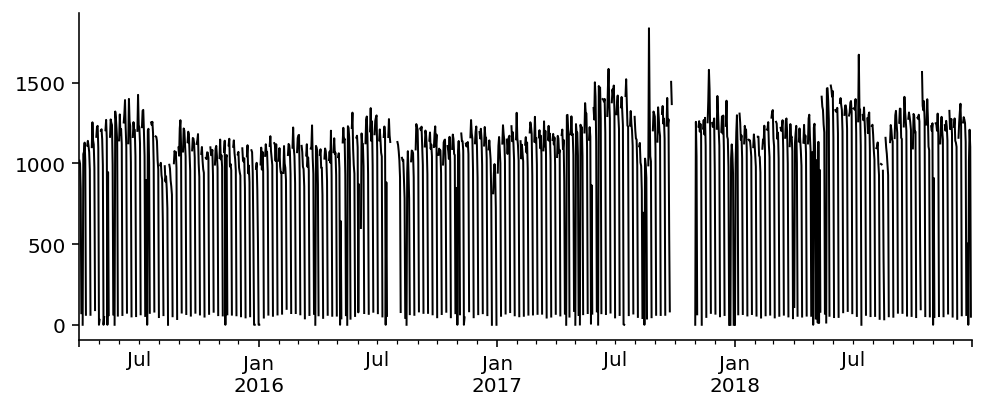

In [4]:
daily["numcalls"].plot(linewidth=1)
print("Number of Calls Each Day")
sns.despine()
fname = "../Figures/calls-by-day.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

Number of Calls each Weekday


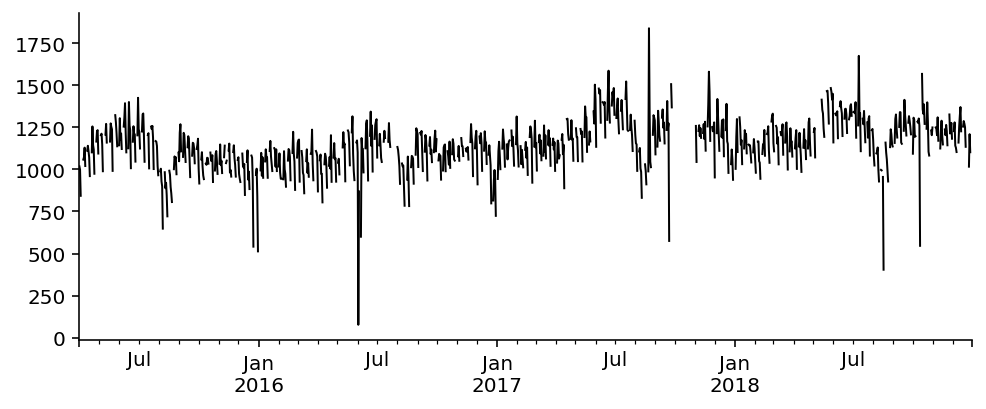

In [5]:
dailyWD = daily.copy()
dailyWD.loc[dailyWD.index.weekday == 5, "numcalls"] = np.NaN
dailyWD.loc[dailyWD.holiday, "numcalls"] = np.NaN
dailyWD["numcalls"].plot(linewidth=1);
print("Number of Calls each Weekday")
sns.despine()
# plt.savefig("../Figures/calls-by-weekday.pdf")

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/calls-by-weekday-squarer.pdf'.


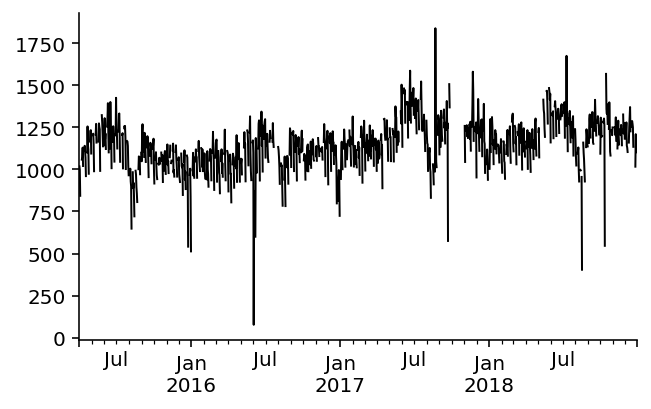

In [6]:
plt.figure(figsize=[5,3])
dailyWD["numcalls"].plot(linewidth=1);
sns.despine()
fname = "../Figures/calls-by-weekday-squarer.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

Number of Calls each Weekday in 2016
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/calls-by-weekday-2016-squarer.pdf'.


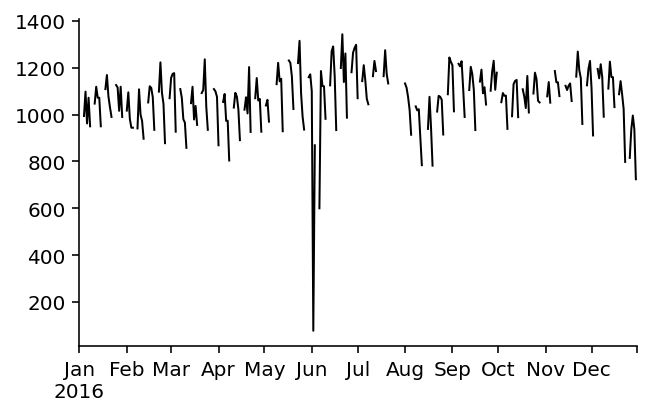

In [7]:
df = daily["2016"].copy() 
df.loc[df.index.weekday == 5, "numcalls"] = np.NaN
df.loc[df.holiday, "numcalls"] = np.NaN

plt.figure(figsize=[5,3])
df["numcalls"].plot(linewidth=1);
print("Number of Calls each Weekday in 2016")
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
sns.despine()
fname = "../Figures/calls-by-weekday-2016-squarer.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

In [8]:
xt = range(6), ["Mon", "Tues", "Wed", "Thur", "Fri", "Sat"]

In [9]:
dd = daily.copy() 
dd.loc[dd.holiday, "numcalls"] = np.NaN

Number of Calls by Day of Week


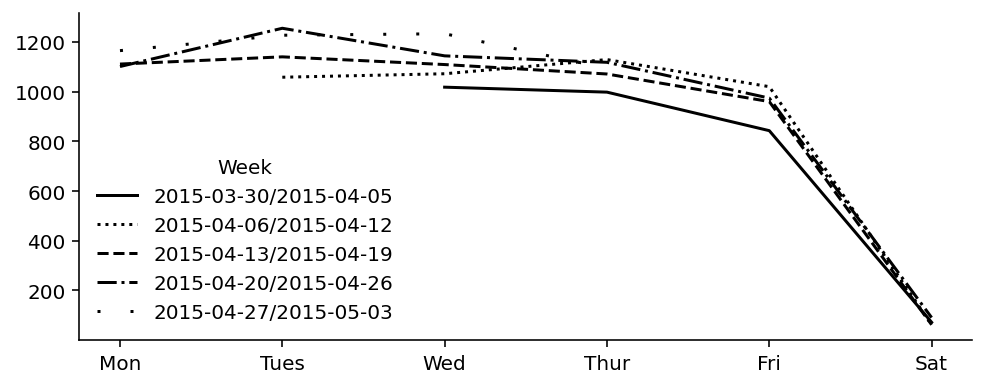

In [10]:
by_week(dd.first("M").numcalls).plot()
print("Number of Calls by Day of Week")
plt.xticks(*xt)
plt.legend(frameon=False, title="Week")
sns.despine()
# plt.savefig("../Figures/calls-by-day-of-week-2015-04.pdf");

First Week (2017-01-02 to 2017-01-07)


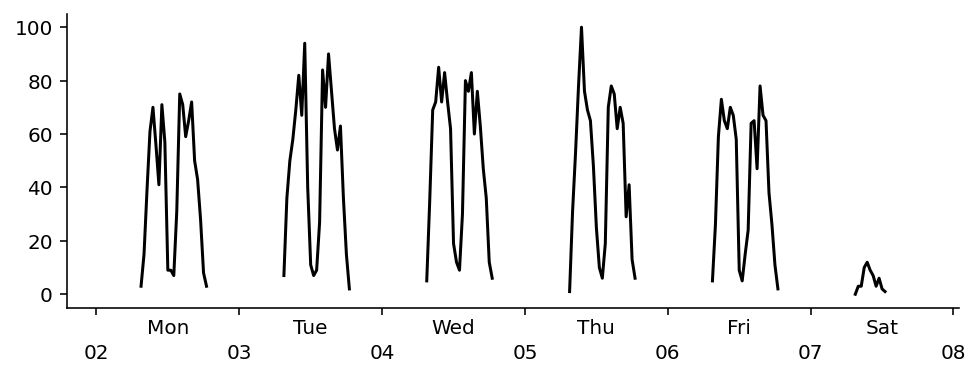

In [11]:
if COLOUR:
    halfhours.numcalls.first("W").groupby(pd.Grouper(freq="D")).apply(plt.plot)
else:
    week = halfhours.numcalls.first("W")
    week = add_nans_to_days(week)
    week.plot()

plt.gca().margins(x=0.1)
put_days_between_ticks(numletters=3, dateskip=1)

d1, d2 = min_max_dates(halfhours.first("W"))
print(f"First Week ({d1} to {d2})");
sns.despine()
# plt.savefig(f"../Figures/calls-during-{d1}-week-side-colorful.pdf")

First Week (2017-01-02 to 2017-01-07)
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/calls-during-2017-01-02-week-side-squarer.pdf'.


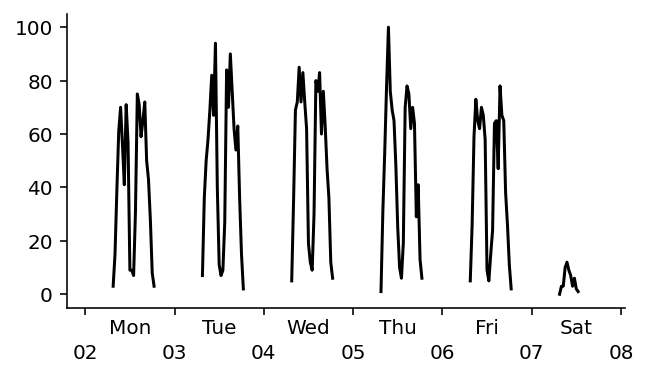

In [12]:
plt.figure(figsize=[5,3])

if COLOUR:
    halfhours.numcalls.first("W").groupby(pd.Grouper(freq="D")).apply(plt.plot)
else:
    week = halfhours.numcalls.first("W")
    week = add_nans_to_days(week)
    week.plot()

plt.gca().margins(x=0.1)
put_days_between_ticks(numletters=3, dateskip=1)

d1, d2 = min_max_dates(halfhours.first("W"))
print(f"First Week ({d1} to {d2})")
sns.despine()
fname = f"../Figures/calls-during-{d1}-week-side-squarer.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

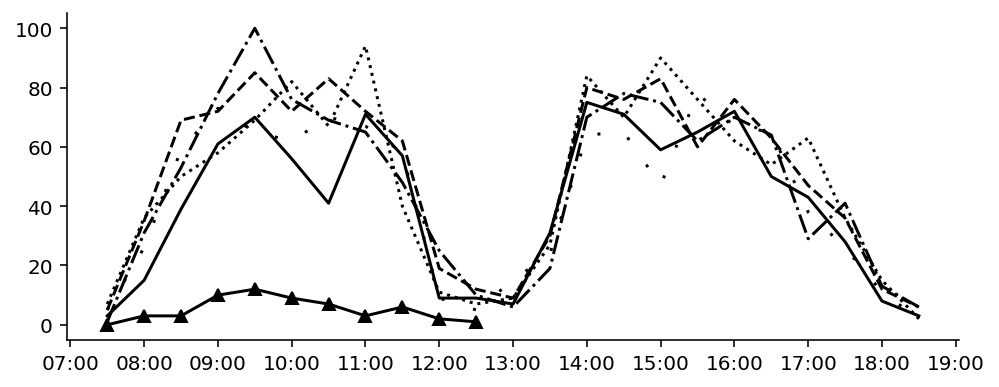

In [13]:
d1, d2 = plot_by_day(halfhours.first("W")) 
# plt.savefig(f"../Figures/calls-during-{d1}-week.pdf")

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/calls-during-2017-01-02-work-week-squarer.pdf'.


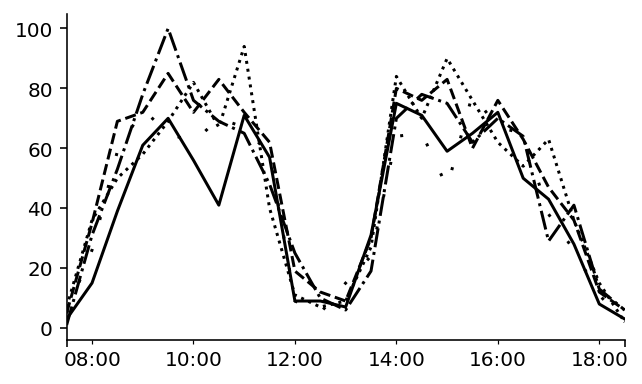

In [14]:
plt.figure(figsize=[5, 3])

def print_day(series):
    series.index -= pd.Timedelta(days=series.index.day[0])
    series.plot()

workWeek = halfhours.numcalls.first("5D")
workWeek.groupby(workWeek.index.date).apply(print_day)
plt.xlabel("")
sns.despine()
fname = f"../Figures/calls-during-{d1}-work-week-squarer.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

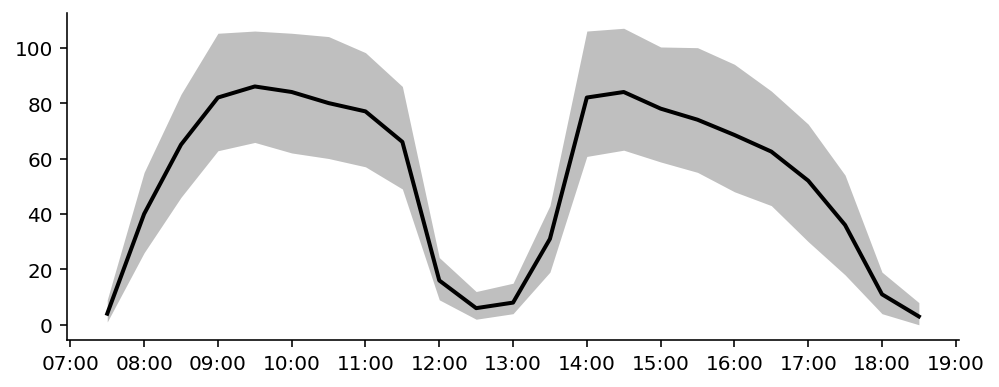

In [15]:
hh = halfhours[halfhours.index.day_name() != "Saturday"].copy()
hh.loc[hh.holiday, "numcalls"] = np.NaN
plot_median(hh["numcalls"]);
# plt.savefig("../Figures/calls-by-halfhour-weekdays-quantiles.pdf")

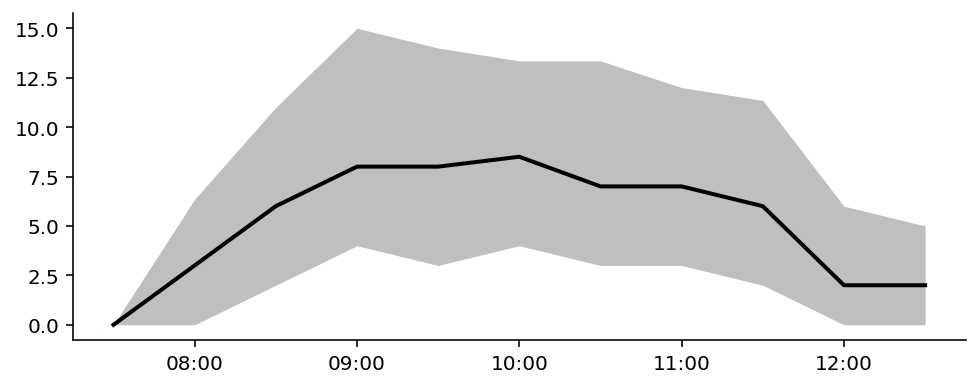

In [16]:
hh = halfhours[halfhours.index.day_name() == "Saturday"].copy()
hh.loc[hh.holiday, "numcalls"] = np.NaN
plot_median(hh["numcalls"]);
# plt.savefig("../Figures/calls-by-halfhour-saturdays-quantiles.pdf")

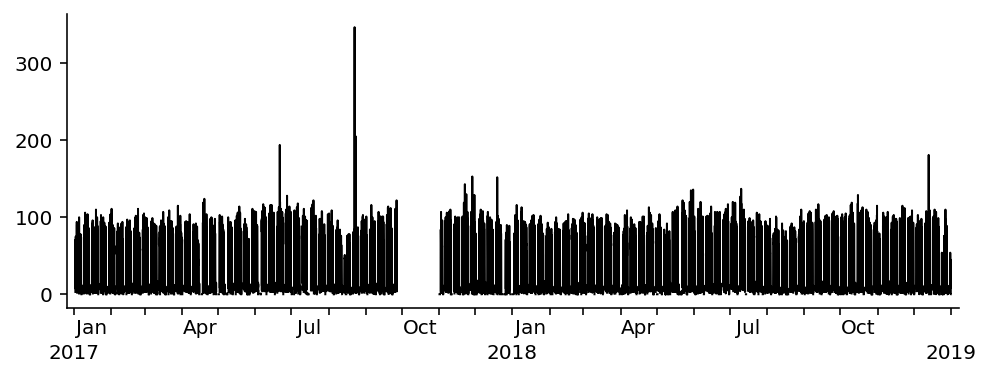

In [17]:
# hhNan = add_nans_to_days(halfhours)

# hhNan.numcalls.plot(linewidth=1);
# plt.margins(x=0.01)
# put_months_between_ticks(dateskip=3)
# sns.despine()
## fname = "../Figures/calls-by-halfhour.pdf"
## plt.savefig(fname)
## !pdfcrop $fname $fname

(18225, 4) (3775, 4)
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/calls-by-halfhour.pdf'.


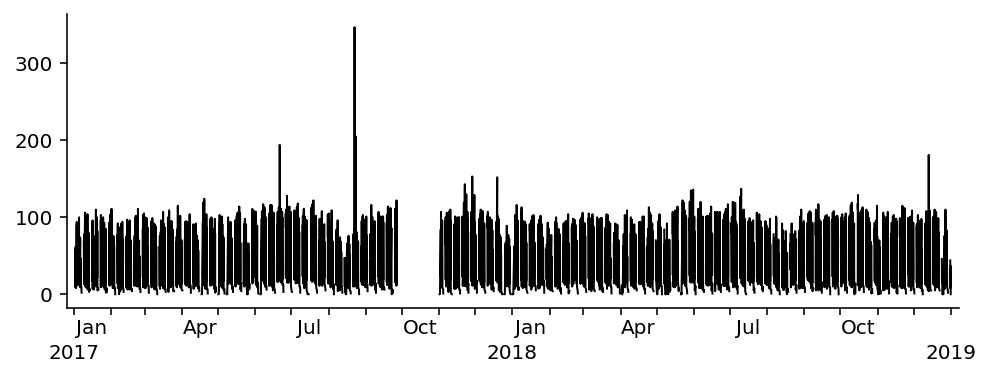

In [18]:
hhNan = add_nans_to_days(halfhours)

hhNanSub = hhNan.loc[(hhNan.index.minute == 0) | (hhNan.numcalls > 90)]
hhNanSub = hhNanSub.loc[((hhNanSub.index.hour % 3) == 0) | (hhNanSub.numcalls > 90)]
print(hhNan.shape, hhNanSub.shape)
hhNanSub.numcalls.plot(linewidth=1);
plt.margins(x=0.01)
put_months_between_ticks(dateskip=3)
sns.despine()
fname = "../Figures/calls-by-halfhour.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

# Fit a GLM to the daily resolution data

Adding factors/features for the linear regression to train on.

In [19]:
dd = daily.copy()

In [20]:
# Features relating to the date-time 
dd["workday"] = dd.index.weekday < 5
dd["day"] = dd.index.weekday
dd["month"] = dd.index.month
dd["relativedays"] = (dd.index - dd.index[0]).days

# Flag whether this date follows holiday period
dd["prevhol"] = False
dd["prev2hol"] = False
holDates = np.unique(dd.loc[dd.holiday].index.date)
dd.loc[dd.index.isin(holDates + pd.Timedelta("1D")), "prevhol"] = True
dd.loc[dd.index.isin(holDates + pd.Timedelta("2D")), "prev2hol"] = True

In [21]:
# Pull out the indices on which we will train and test.
dt_train = dd.loc[:"2017-09-26"].index
dt_test = dd.loc["2017-11-02":].index

# N.B. Don't want to train on dates which are known holidays.
# They will obviously have ~0 arrivals, so will treat separately.
holInd = dd.loc[dd["holiday"]].index

dt_train = dt_train.difference(holInd)
dt_test = dt_test.difference(holInd)

# Also, can remove all Sundays and other missing
# dates (like the 8 days in 07/2016).
dt_train = dt_train[~dd.loc[dt_train].numcalls.isna()]
dt_test = dt_test[~dd.loc[dt_test].numcalls.isna()]

dt_both = dt_train.union(dt_test)

# Extract the target, the number of calls which actually did
# arrive at each time period, for the train and test periods.
y_train = dd.loc[dt_train, ["numcalls"]].to_numpy()
y_test = dd.loc[dt_test, ["numcalls"]].to_numpy()

In [22]:
df_train = dd.loc[dt_train]
df_test = dd.loc[dt_test]
df_both = dd.loc[dt_both]

df = df_train

### For NuPIC, export some of the same data

In [23]:
hh = halfhours.copy()

In [24]:
# Features relating to the date-time 
hh["day"] = hh.index.weekday
hh["month"] = hh.index.month
hh["relativedays"] = (hh.index - hh.index[0]).days

# Flag whether this date follows holiday period
hh["prevhol"] = 0
holDates = np.unique(hh.loc[hh.holiday].index.date)
hh.loc[pd.DatetimeIndex(hh.index.date).isin(holDates + pd.Timedelta("1D")), "prevhol"] = 1

In [25]:
# Pull out the indices on which we will train and test.
dt_train_hh = hh.loc[:"2017-09-26"].index
dt_test_hh = hh.loc["2017-11-02":].index

# N.B. Don't want to train on dates which are known holidays.
# They will obviously have ~0 arrivals, so will treat separately.
holInd = hh.loc[hh["holiday"]].index

dt_train_hh = dt_train_hh.difference(holInd)
dt_test_hh = dt_test_hh.difference(holInd)

# Also, can remove all Sundays and other missing
# dates (like the 8 days in 07/2016).
dt_train_hh = dt_train_hh[~hh.loc[dt_train_hh].numcalls.isna()]
dt_test_hh = dt_test_hh[~hh.loc[dt_test_hh].numcalls.isna()]

dt_both_hh = dt_train_hh.union(dt_test_hh)

In [26]:
df_train_hh = hh.loc[dt_train_hh]
df_test_hh = hh.loc[dt_test_hh]

In [27]:
def fit_and_save_glm(df, form, first=False, fname="glm_models.txt"):
    
    y, X = patsy.dmatrices(form, df, return_type='matrix')
    model = sm.GLM(y, X, family=sm.families.Poisson())
    fit = model.fit()
    
    print(f"Loglikelihood {fit.llf}, BIC {fit.bic}")

    mode = "w" if first else "a"
    with open(fname, mode) as fh:
        fh.write(f"Model: {form}\n\n")
        fh.write(fit.summary().as_text())
        fh.write(f"\n\n")
        
    return fit

In [28]:
form = "numcalls ~ workday"
fit_and_save_glm(df, form, first=True);

Loglikelihood -10219.930901019283, BIC 9340.434689346923


In [29]:
form = "numcalls ~ workday + relativedays"
fit_and_save_glm(df, form);

Loglikelihood -9698.099755146486, BIC 8303.381746844752


In [30]:
form = "numcalls ~ workday + relativedays + C(month)"
fit_and_save_glm(df, form);

Loglikelihood -8330.081809043146, BIC 5640.048696312965


In [31]:
form = "numcalls ~ relativedays + C(month) + C(day)"
fit_and_save_glm(df, form);

Loglikelihood -6887.324119140081, BIC 2780.9707134794826


In [32]:
form = "numcalls ~ relativedays + C(month) + C(day) + prevhol"
fit_and_save_glm(df, form);

Loglikelihood -6827.533239791609, BIC 2667.998304025662


In [33]:
form = "numcalls ~ relativedays + C(month) + C(day) + " \
        + "prevhol + prev2hol"
fit_and_save_glm(df, form);

Loglikelihood -6825.78927032851, BIC 2671.119714342659


#### Final daily model

In [34]:
finalForm = "numcalls ~ relativedays + C(month) + C(day) + prevhol"
finalFit = fit_and_save_glm(df, finalForm, first=True, fname="final_glm_model.txt")

with open('final_glm_model.csv', 'w') as fh:
    fh.write(finalFit.summary().as_csv())

Loglikelihood -6827.533239791609, BIC 2667.998304025662


In [35]:
X_train = patsy.dmatrices(finalForm, df_train, return_type='matrix')[1]
X_test = patsy.dmatrices(finalForm, df_test, return_type='matrix')[1]

df_train["pred"] = finalFit.predict(X_train)
df_test["pred"] = finalFit.predict(X_test)

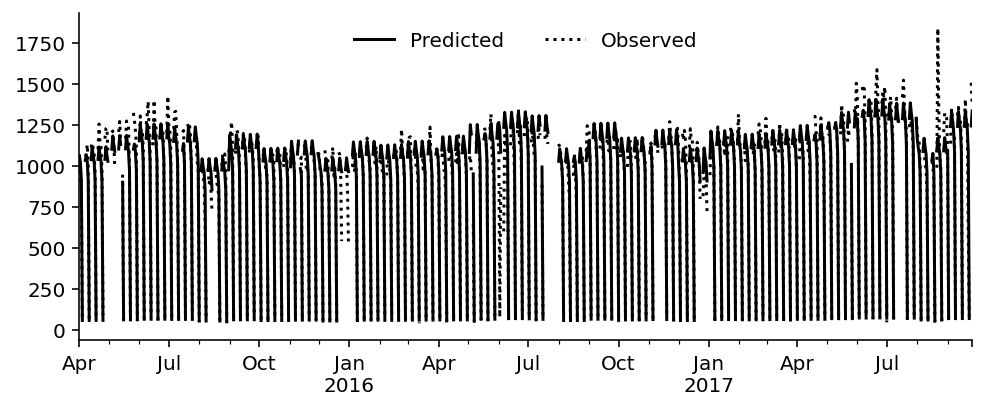

In [36]:
newind = pd.date_range(df_train.index.min(), df_train.index.max())
df_plot = df_train[["pred", "numcalls"]].reindex(newind)
df_plot.plot()
plt.legend(["Predicted", "Observed"], loc=9, frameon=False, ncol=2);
sns.despine()

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/linear-regression-train.pdf'.


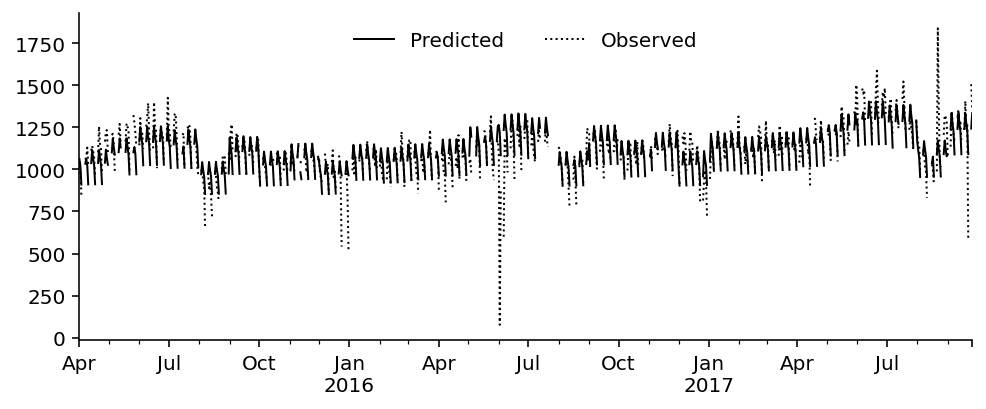

In [37]:
newind = pd.date_range(df_train.index.min(), df_train.index.max())
df_plot = df_train[df_train.workday][["pred", "numcalls"]].reindex(newind)

df_plot.plot(linewidth=1)
        
plt.legend(["Predicted", "Observed"], loc=9, ncol=2, frameon=False);
sns.despine()
fname = "../Figures/linear-regression-train.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/linear-regression-train-scatter.pdf'.


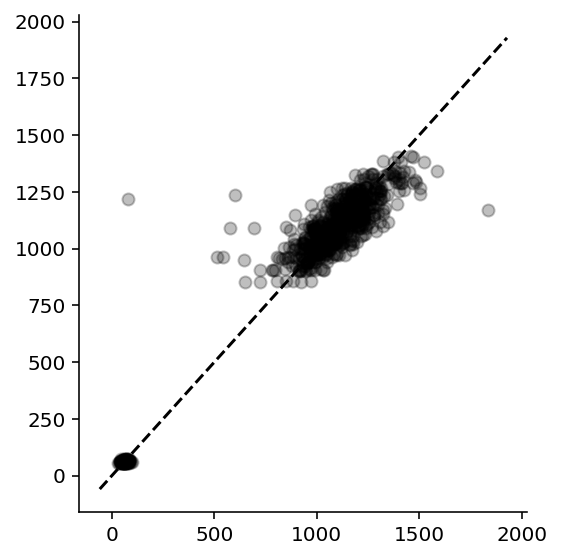

In [38]:
plt.figure(figsize=[4,4])
plt.scatter(df_train["numcalls"], df_train["pred"], alpha=0.25)
xl, xr = plt.xlim()
plt.plot([xl, xr], [xl, xr], color="k", ls="--")
sns.despine()
plt.tight_layout()
fname = "../Figures/linear-regression-train-scatter.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

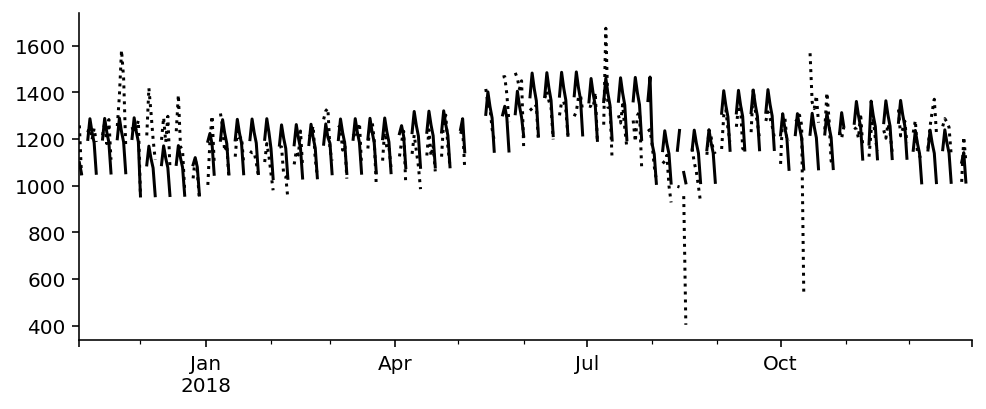

In [39]:
# newind = pd.date_range(df_test.index.min(), df_test.index.max())
# df_plot = df_test[df_test.workday][["pred", "numcalls"]].reindex(newind)
# df_plot.plot(legend=False)
# sns.despine()

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/linear-regression-test-scatter.pdf'.


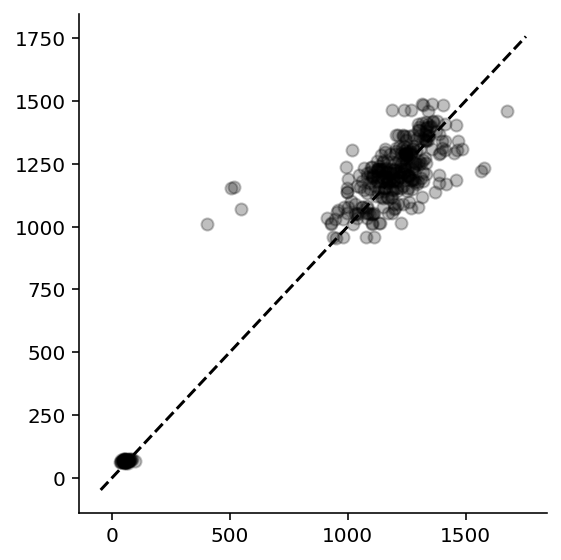

In [40]:
plt.figure(figsize=[4,4])
plt.scatter(df_test["numcalls"], df_test["pred"], alpha=0.25)
xl, xr = plt.xlim()
plt.plot([xl, xr], [xl, xr], color="k", ls="--")
sns.despine()
plt.tight_layout()
fname = "../Figures/linear-regression-test-scatter.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

## Try to estimate the fraction of daily calls which arrive during each half-hour period

In [41]:
hh = halfhours.copy()

In [42]:
# Pull out the indices on which we will train and test.
dt_train_hh = hh.loc[:"2017-09-26"].index
dt_test_hh = hh.loc["2017-11-02":].index

# N.B. Don't want to train on dates which are known holidays.
# They will obviously have ~0 arrivals, so will treat separately.
holInd = hh.loc[hh["holiday"]].index

dt_train_hh = dt_train_hh.difference(holInd)
dt_test_hh = dt_test_hh.difference(holInd)

# Also, can remove all Sundays and other missing
# dates (like the 8 days in 07/2016).
dt_train_hh = dt_train_hh[~hh.loc[dt_train_hh].numcalls.isna()]
dt_test_hh = dt_test_hh[~hh.loc[dt_test_hh].numcalls.isna()]

dt_both_hh = dt_train_hh.union(dt_test_hh)

In [43]:
fracs = hh[["numcalls"]].copy()

fracs["frac"] = fracs["numcalls"]
fracs["dayscalls"] = fracs["numcalls"]

dates = [str(d) for d in np.unique(fracs.index.date)]

for date in dates:
    fracs.loc[date, "dayscalls"] = dd.loc[date, "numcalls"]
    fracs.loc[date, "frac"] /= dd.loc[date, "numcalls"]

#### Separate the weekdays from saturdays

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/frac-calls-halfhour.pdf'.


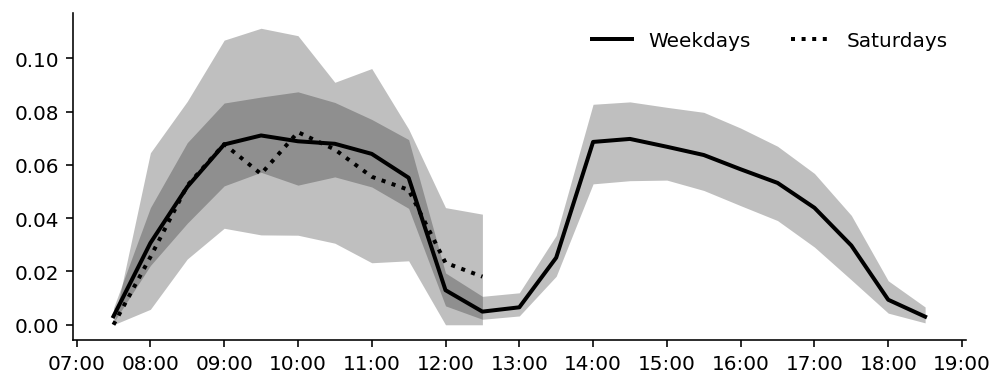

In [44]:
fracsWD = fracs[fracs.index.weekday < 5].copy()
fracsSat = fracs[fracs.index.weekday == 5].copy()
fracsSat.loc[:,"frac"] /= 2

l1 = plot_median(fracsWD.loc[fracsWD.index.intersection(dt_train_hh), "frac"])
l2 = plot_median(fracsSat.loc[fracsSat.index.intersection(dt_train_hh), "frac"])
plt.legend([l1[0], l2[0]], ["Weekdays", "Saturdays"], ncol=2, frameon=False)
fname = "../Figures/frac-calls-halfhour.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

In [45]:
if COLOUR:

    fracsWD = fracs[fracs.index.weekday < 5].copy()
    fracsSat = fracs[fracs.index.weekday == 5].copy()

    fracsWD = fracsWD.loc[fracsWD.index.intersection(dt_train_hh)]
    fracsSat = fracsSat.loc[fracsSat.index.intersection(dt_train_hh)]

    low1 = fracsWD.frac.groupby(fracsWD.index.time).quantile(0.05)
    med1 = fracsWD.frac.groupby(fracsWD.index.time).quantile(0.5)
    up1 = fracsWD.frac.groupby(fracsWD.index.time).quantile(0.95)

    dtIndex = time_to_datetime_index(low1.index)
    low1.index = dtIndex
    med1.index = dtIndex
    up1.index = dtIndex

    low2 = fracsSat.frac.groupby(fracsSat.index.time).quantile(0.05)
    med2 = fracsSat.frac.groupby(fracsSat.index.time).quantile(0.5)
    up2 = fracsSat.frac.groupby(fracsSat.index.time).quantile(0.95)

    dtIndex = time_to_datetime_index(low2.index)
    low2.index = dtIndex
    med2.index = dtIndex
    up2.index = dtIndex

    fig, ax1 = plt.subplots()

    l0 = ax1.plot(med1, lw=2)
    c0 = l0[0].get_color()
    ax1.fill_between(low1.index, low1, up1, alpha=0.25, color=c0, lw=0)

    ax1.tick_params(axis='y', labelcolor=c0)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    c = '#ff7f0e'
    l = ax2.plot(med2, lw=2, color=c)
    ax2.fill_between(low2.index, low2, up2, alpha=0.25, color=c, lw=0)

    ax2.tick_params(axis='y', labelcolor=c)

    plt.gca().xaxis.set_major_locator(mdates.HourLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

    ax1.set_ylim([0, 0.12])
    ax2.set_ylim([0, 0.24])
    ax1.set_yticks([0.02, 0.04, 0.06, 0.08, 0.1])
    ax2.set_yticks([0.04, 0.08, 0.12, 0.16, 0.2])

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.legend([l0[0], l[0]], ['Weekdays', 'Saturdays'], frameon=False)
    sns.despine(right=False)

    fname = "../Figures/frac-calls-halfhour-dual-axes.pdf"
    plt.savefig(fname)
    !pdfcrop $fname $fname

#### Okay, treat all the same, but pretend that twice as many calls arrive on each Saturday to make things even

In [46]:
fracsAdj = fracs.copy()
fracsAdj.loc[fracsAdj.index.weekday == 5, "frac"] /= 2
fracsAdj.loc[fracsAdj.index.weekday == 5, "dayscalls"] *= 2

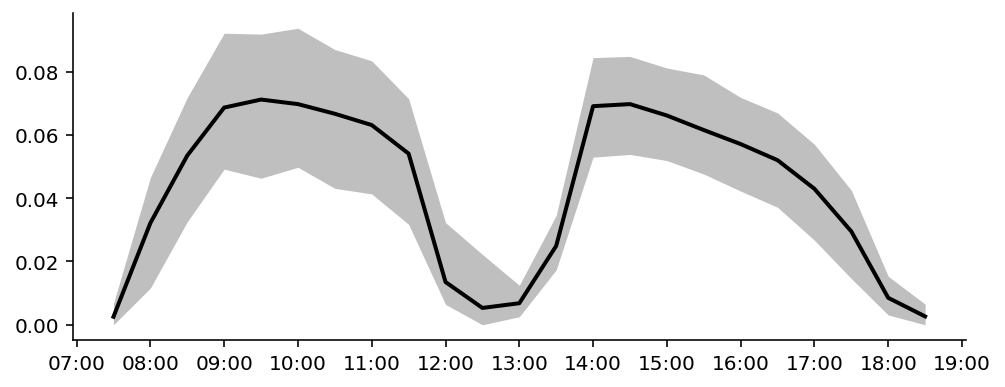

In [47]:
plot_median(fracsAdj.frac);

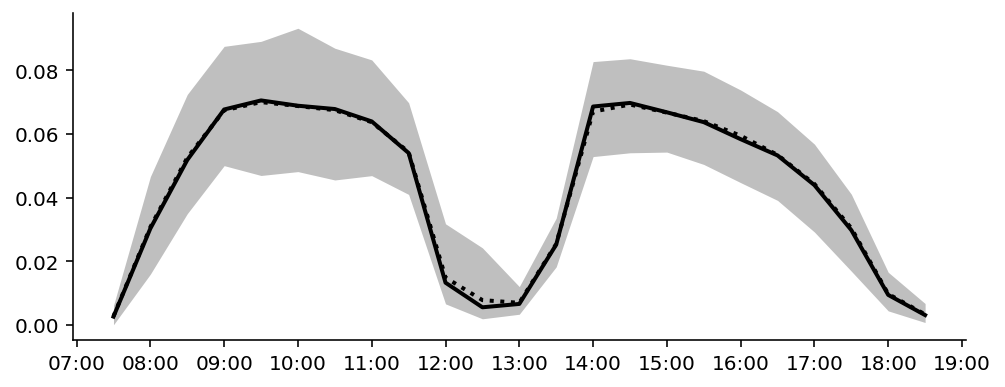

In [48]:
fracsAdjTrain = fracsAdj.loc[dt_train_hh]
plot_median(fracsAdjTrain.frac);

mean = fracsAdjTrain.frac.groupby(fracsAdjTrain.index.time).mean()
mean /= np.sum(mean)
mean.index = time_to_datetime_index(mean.index)
plt.plot(mean, lw=2);

In [49]:
fracPerHH = fracsAdjTrain.frac.groupby(fracsAdjTrain.index.time).mean()
fracPerHH /= fracPerHH.sum()

In [50]:
fracPerHH.sum()

0.9999999999999998

#### Is the hourly pattern different on busy days to quiet days?

In [51]:
quartiles = dd.numcalls.quantile([0, 0.25, 0.5, 0.75, 1]).to_numpy()

In [52]:
if COLOUR:
    lines = []
    l = plot_median(fracsAdj.frac)
    lines.append(l)

    for q1, q2 in zip(quartiles[:-1], quartiles[1:]):
        inds = (fracsAdj.dayscalls > q1) & (fracsAdj.dayscalls < q2)
        fracsAdjQ = fracsAdj.loc[inds]
        l = plot_median(fracsAdjQ.frac)
        lines.append(l)

    y1, y2 = plt.ylim()
    plt.ylim([y1, y2*1.1])

    lines = [l[0] for l in lines]
    plt.legend(lines, ["0%-25%", "25%-50%", "50%-75%", "75%-100%"], loc=9, ncol=4, frameon=False);
    fname = "../Figures/frac-calls-by-busyness.pdf"
    plt.savefig(fname)
    !pdfcrop $fname $fname

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/frac-calls-by-busyness.pdf'.


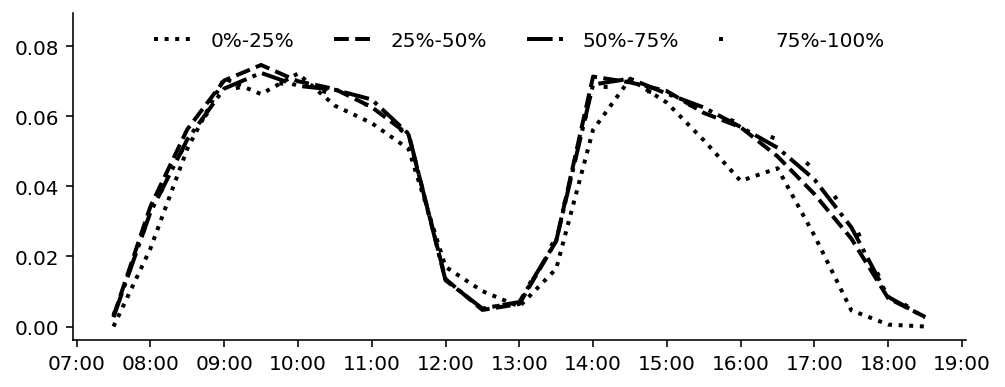

In [53]:
if not COLOUR:

    with plt.style.context({'axes.prop_cycle': monochrome[1:]}):

        for q1, q2 in zip(quartiles[:-1], quartiles[1:]):
            inds = (fracsAdj.dayscalls > q1) & (fracsAdj.dayscalls < q2)
            fracsAdjQ = fracsAdj.loc[inds]
            plot_median(fracsAdjQ.frac, quantile=False)

    y1, y2 = plt.ylim()
    plt.ylim([y1, y2*1.14])

    plt.legend(["0%-25%", "25%-50%", "50%-75%", "75%-100%"], loc=9, ncol=4, frameon=False);
    fname = "../Figures/frac-calls-by-busyness.pdf"
    plt.savefig(fname)
    !pdfcrop $fname $fname

## Make our predictions based on the linear regression over the daily dataset, and subdivided into half-hours using the estimated fractions above

In [54]:
hh = halfhours.copy()

hh["constpred"] = 0.0
hh["pred"] = 0.0

ddNotNA = dd.dropna()

X_dd = patsy.dmatrices(finalForm, ddNotNA, return_type='matrix')[1]
preds = pd.Series(finalFit.predict(X_dd), index=ddNotNA.index)

for d in np.unique(ddNotNA.index.date):
    if str(d) in hh.index:
        dDay = hh.loc[str(d)].dropna()
        inds = dDay.index
        hhDist = fracPerHH[inds.time].to_numpy()
        hhDist /= np.sum(hhDist)

        hh.loc[inds, "constpred"] = preds[d] / len(inds)
        hh.loc[inds, "pred"] = preds[d] * hhDist

In [55]:
df_train_hh = hh.loc[dt_train_hh]
df_test_hh = hh.loc[dt_test_hh]
df_both_hh = hh.loc[dt_train_hh.union(dt_test_hh)]

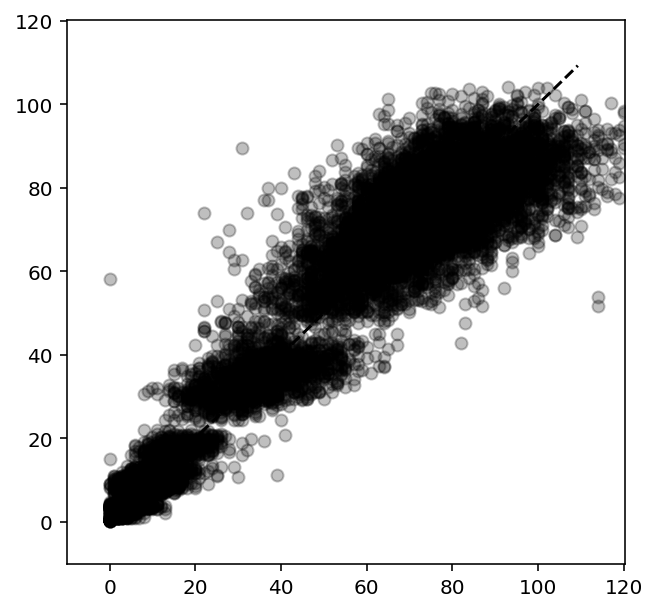

In [58]:
plt.figure(figsize=[5,5])
plt.scatter(df_both_hh["numcalls"], df_both_hh["pred"], alpha=0.25)
mr = min(plt.xlim()[1], plt.ylim()[1])
plt.plot([0, mr], [0, mr], color="k", ls="--")
plt.xlim((-10, mr * 1.1)); plt.ylim((-10, mr * 1.1))
plt.show()

## Choosing the threshold for CUSUM to raise alarms at

In [59]:
ρ = 1.2

In [60]:
df_train_hh = hh.loc[dt_train_hh]
df_test_hh = hh.loc[dt_test_hh]
df_both_hh = hh.loc[dt_train_hh.union(dt_test_hh)]

Let's simulate some CUSUM processes $V_t$ under the pre-change distribution. We need this to calibrate the threshold $m$ at which to raise alarms $T = \inf\{ t: V_t > m \}$.

Simulate `R` i.i.d. CUSUM processes for `tMax` timesteps each.

In [61]:
%%time 

tMax = 10**5
R = 10**3

λ = halfhours.numcalls.dropna().mean()

rng = default_rng(1)

Ns = np.empty((tMax, R), dtype=np.int64)
Vs = np.empty((tMax, R), dtype=np.float64)
Ms = np.empty((tMax, R), dtype=np.float64)

β = (ρ-1)/(np.log(ρ))

for r in trange(R):
    dN = rng.poisson(λ, size=tMax)
    U = np.cumsum(dN - β*λ)
    V = np.maximum(U - np.insert(np.minimum.accumulate(U), 0, 0)[:-1], 0)
    
    Ns[:,r] = np.cumsum(dN)
    Vs[:,r] = V
    Ms[:,r] = np.maximum.accumulate(V)


Wall time: 19 s


Plot some extracts of the CUSUM simulated processes.

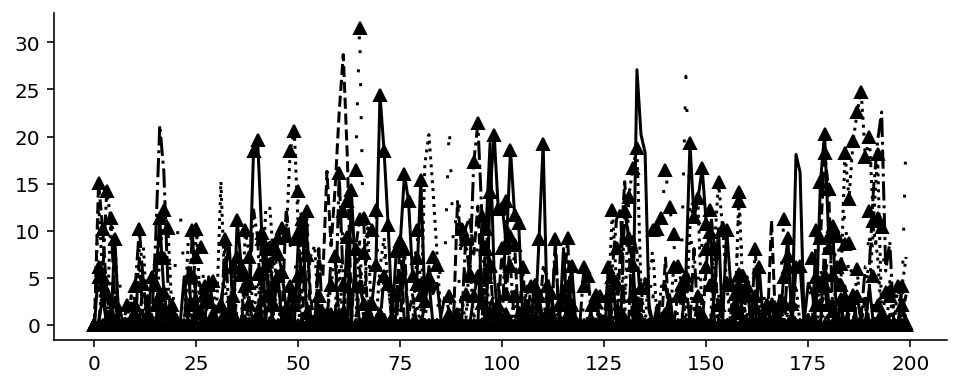

In [62]:
plt.plot(Vs[:200,:10]); sns.despine();

In the process, we calculated $M_t = \max_{s \le t} V_s$ the running maximum of each CUSUM process. This is useful for finding when an alarm would have been raised for a certain $m$ threshold.

Also, we can find the largest $m$ threshold which is exceeded by every simulated CUSUM process:

In [63]:
np.min(Ms[-1])

43.62114893924445

So let's calculate some different expected false positive values when CUSUM is run with $m$ taking values in a grid.

In [64]:
msConst = np.arange(1, np.floor(np.min(Ms[-1]))+1)
msConst[0], msConst[-1]

(1.0, 43.0)

The generalised Lorden criterion is the constraint that $\mathbb{E}[N_T] \ge \pi$ where $T = \inf\{ t : V_t > m \}$. We calculate and plot the relationship between $m$ and $\mathbb{E}[N_T]$ over the grid of $m$ values above. 

In [65]:
ExpN_TConst = gen_lorden_criterion(msConst, Ns, Ms)

In [66]:
πConst = daily["2018"].numcalls.sum()
πToM = interp1d(ExpN_TConst, msConst)
mConst = πToM(πConst)
πConst, mConst

(305259.0, array(38.69159283))

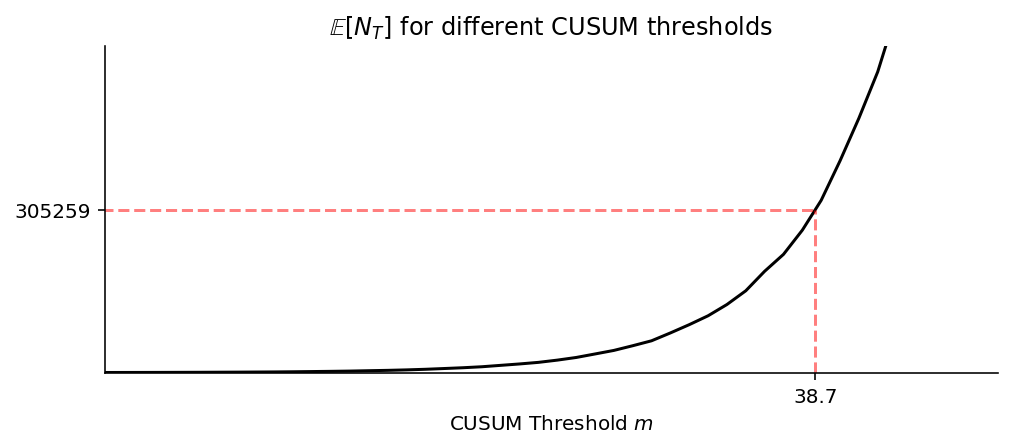

In [67]:
plt.plot(msConst, ExpN_TConst)

plt.title("$\mathbb{E}[N_T]$ for different CUSUM thresholds")
plt.xlabel("CUSUM Threshold $m$")

plt.plot([0, mConst], [πConst, πConst], 'r--', alpha=0.5)
plt.plot([mConst, mConst], [0, πConst], 'r--', alpha=0.5)

plt.xticks([mConst])
plt.yticks([πConst])
sns.despine()

plt.xlim(1, mConst*1.25)
plt.ylim(0, πConst*2)

plt.show()

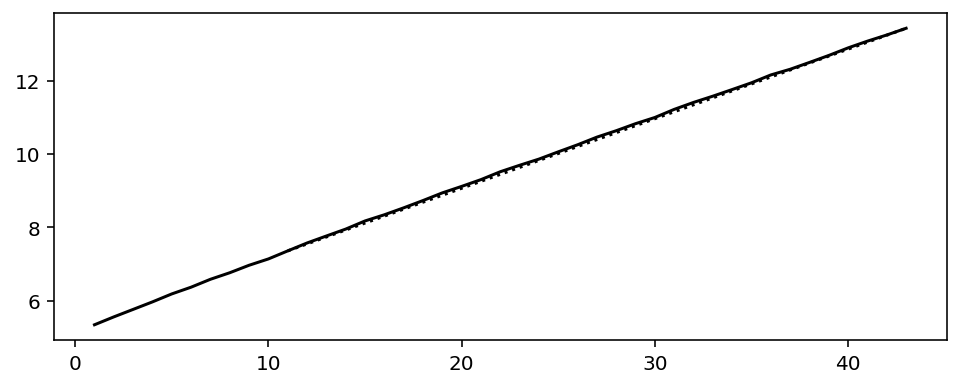

In [68]:
plt.plot(msConst, np.log(ExpN_TConst))
plt.plot(msConst[[10,-1]], np.log(ExpN_TConst[[10,-1]]))

## Find the $m$ applicable to the GLM adaptive intensity case

In [69]:
%%time 

rng = default_rng(1)

R = 10**4

λ = df_test_hh["pred"].to_numpy()
tMax = len(λ)

Ns = np.empty((tMax, R), dtype=np.int64)
Vs = np.empty((tMax, R), dtype=np.float64)
Ms = np.empty((tMax, R), dtype=np.float64)

β = (ρ-1)/(np.log(ρ))

for r in trange(R):
    dN = rng.poisson(λ)
    U = np.cumsum(dN - β*λ)
    V = np.maximum(U - np.insert(np.minimum.accumulate(U), 0, 0)[:-1], 0)
    
    Ns[:,r] = np.cumsum(dN)
    Vs[:,r] = V
    Ms[:,r] = np.maximum.accumulate(V)


Wall time: 15.3 s


In [70]:
ms = np.arange(1, np.floor(np.min(Ms[-1]))+1)
ms[0], ms[-1]

(1.0, 27.0)

In [71]:
ExpN_T = gen_lorden_criterion(ms, Ns, Ms)

In [72]:
avgWeek = df_both.groupby(pd.Grouper(freq="W")).numcalls.sum().mean()
π = avgWeek * 7
π = 30000
πToM = interp1d(ExpN_T, ms)
m = πToM(π)
π, m

(30000, array(25.07233099))

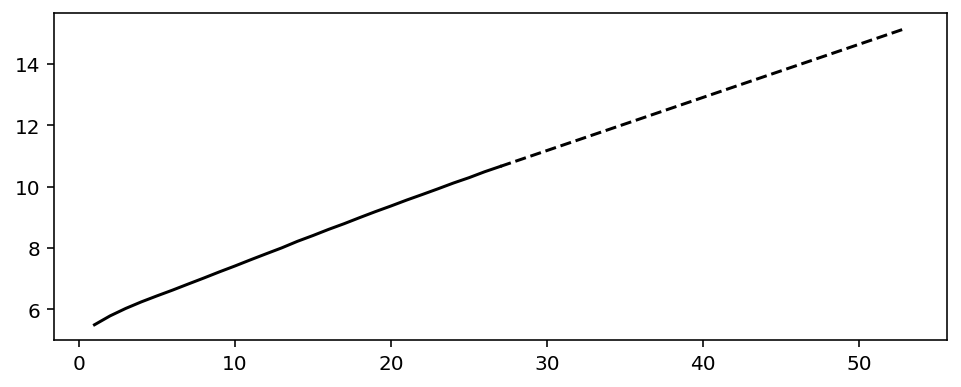

In [73]:
plt.plot(ms, np.log(ExpN_T))
mToLogπ = interp1d(ms, np.log(ExpN_T), fill_value="extrapolate")

msBig = np.arange(ms[-1], ms[-1]*2)
LogExpN_TBig = mToLogπ(msBig) 
ExpN_TBig = np.exp(LogExpN_TBig) 

plt.plot(msBig, mToLogπ(msBig), ls="--");

In [74]:
π = πConst
LogπToM = interp1d(np.log(ExpN_T), ms, fill_value="extrapolate")
m = LogπToM(np.log(π))
π, m

(305259.0, array(38.36762826))

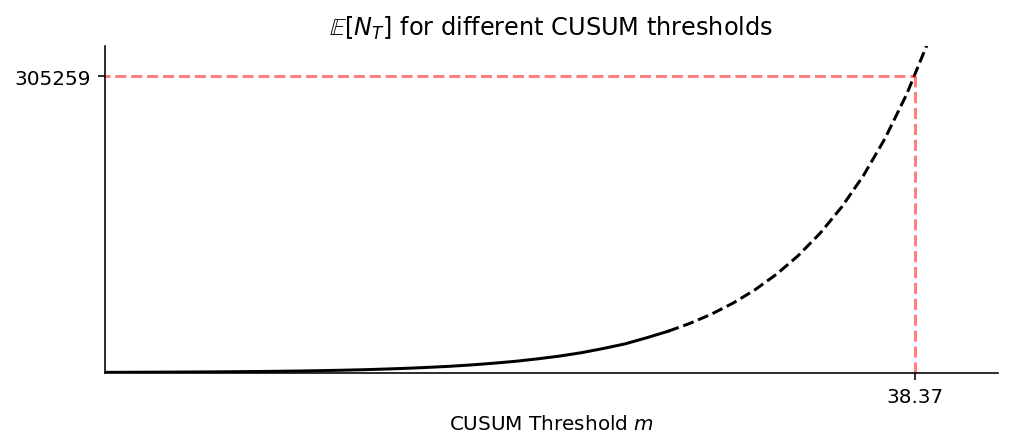

In [75]:
line, = plt.plot(ms, ExpN_T)
plt.plot(msBig, ExpN_TBig, ls="--", c=line.get_color());

plt.title("$\mathbb{E}[N_T]$ for different CUSUM thresholds")
plt.xlabel("CUSUM Threshold $m$")

plt.plot([0, m], [π, π], 'r--', alpha=0.5)
plt.plot([m, m], [0, π], 'r--', alpha=0.5)

plt.xticks([m])
plt.yticks([π])
sns.despine()

plt.xlim(1, m*1.1)
plt.ylim(0, π*1.1)

plt.show()

# Running CUSUM 

### Doing a stupid CUSUM with constant expected arrival intensity

In [76]:
β = (ρ - 1) / np.log(ρ)

# Set constant arrival intensity 
λ = df_train_hh.numcalls.mean()

csNaive = pd.DataFrame({"λ": λ, "N": df_test_hh.numcalls})

N_t = np.cumsum(csNaive["N"])
Lambda_t = np.cumsum(csNaive["λ"])

U_t = N_t - β * Lambda_t
csNaive["V"] = U_t - U_t.shift(1).cummin().fillna(0)
csNaive.loc[csNaive["V"] < 0, "V"] = 0

csNaive.index.name = ""

In [77]:
if COLOUR:
    csColors = [c['color'] for c in mpl.rcParams['axes.prop_cycle']]
    csColors.pop(3)
    csColors = csColors[:4]
else:
    stylesList = [s for s in monochrome]

styles = {
    "λ": {"c": "k", "marker": "", "ls":"-", "label": "$\lambda_t$"},
    "N": {"c": "k", "marker": "", "ls":"-", "alpha": 0.4, "label": "$\Delta N_t$"},
    "m": {"c": "k", "marker": "", "ls":"--", "label": "$m$"},
    "V": {"c": "k", "marker": "", "ls":":", "lw": 1, "label": "$V_t$"},
    "NuPIC": {"c": "k", "marker": "", "ls":"-.", "label": "NuPIC"}
}

stylesNL = {
    col: {key: styles[col].get(key) for key in ("c", "marker", "ls", "alpha")}
    for col in styles.keys()
}

stylesNL

{'λ': {'c': 'k', 'marker': '', 'ls': '-', 'alpha': None},
 'N': {'c': 'k', 'marker': '', 'ls': '-', 'alpha': 0.4},
 'm': {'c': 'k', 'marker': '', 'ls': '--', 'alpha': None},
 'V': {'c': 'k', 'marker': '', 'ls': ':', 'alpha': None},
 'NuPIC': {'c': 'k', 'marker': '', 'ls': '-.', 'alpha': None}}

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/naive-cusum.pdf'.


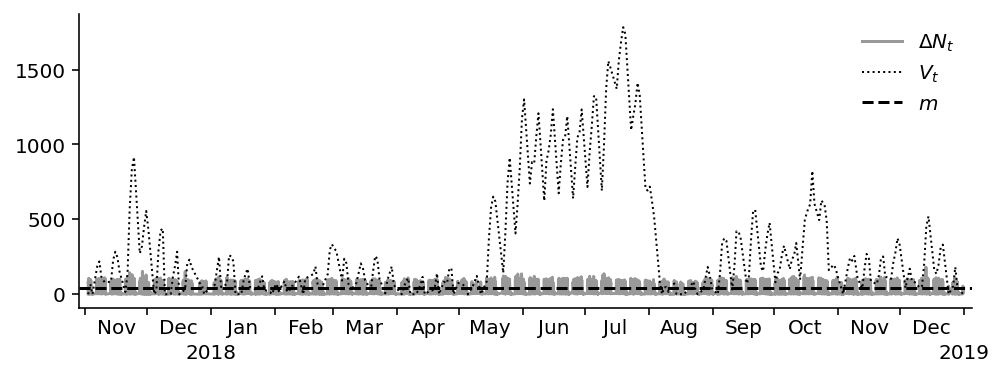

In [78]:
csNaive["N"].plot(**styles["N"])
csNaive["V"].iloc[::25].plot(**styles["V"]) 
plt.axhline(mConst, **styles["m"])

plt.margins(x=0.01)
put_months_between_ticks()
plt.legend(frameon=False)

sns.despine()
fname = "../Figures/naive-cusum.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

In [79]:
np.mean(csNaive.loc["2018", "V"] > mConst)

0.7953179373615944

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/naive-cusum-2018-start.pdf'.


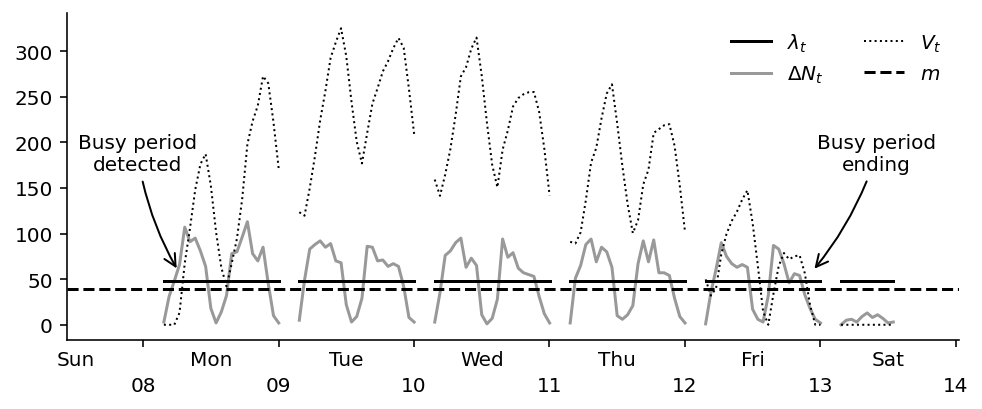

In [80]:
csStart = add_nans_to_days(csNaive["2018-01-08":].first("6D").copy())
csStart.loc[pd.Timestamp("2018-01-07 12:00")] = [0, np.NaN, 0]
csStart.loc[pd.Timestamp("2018-01-13 18:00")] = [0, np.NaN, 0]
csStart = csStart.sort_index()

newTime = stretch_time(csStart.index, scale=1.85)

for col in csStart.columns:
    plt.plot(newTime, csStart[col], **styles[col])

plt.axhline(mConst, **styles["m"])

plt.margins(x=0.01)
put_days_between_ticks(numletters=3, dateskip=1)
plt.legend(ncol=2, frameon=False)
sns.despine()

# Add annotations to the plot describing when the alarms are raised
alarmed = csStart[csStart["V"] > mConst]

# Annotation for the beginning of the busy period
xTextDate = pd.Timestamp("2018-01-07 23:00")
xText = mdates.date2num(xTextDate)
yText = 170 

xDate = alarmed.index[0] - pd.Timedelta("0.35H")
x = mdates.date2num(stretch_time([xDate]))

plt.annotate("Busy period\ndetected", xytext=(xText, yText), xy=(x, mConst*1.5),
            arrowprops=dict(arrowstyle="->", mutation_scale=15, connectionstyle="arc3,rad=.1"), ha='center')

# Annotation for the end of the busy period
xTextDate = pd.Timestamp("2018-01-13 10:00")
xText = mdates.date2num(xTextDate)
yText = 170

xDate = alarmed.index[-1] + pd.Timedelta("0.25H")
x = mdates.date2num(stretch_time([xDate]))

plt.annotate("Busy period\nending", xytext=(xText, yText), xy=(x, mConst*1.5),
            arrowprops=dict(arrowstyle="->", mutation_scale=15, connectionstyle="arc3,rad=-.1"), ha='center')

fname = "../Figures/naive-cusum-2018-start.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

## Using the adaptive intensity based on the GLM predictions

In [81]:
cs = df_test_hh[["pred", "numcalls"]].copy()
cs.columns = ["λ", "N"]
cs.index.name = ""

N_t = np.cumsum(cs["N"])
Lambda_t = np.cumsum(cs["λ"])

U_t = N_t - β * Lambda_t
cs["V"] = U_t - U_t.shift(1).cummin().fillna(0)
cs.loc[cs["V"] < 0, "V"] = 0

print(np.mean(cs["N"] > cs["λ"]))
print(np.mean(cs.loc["2018", "V"] > m))

0.4329559405265312
0.10661183169882948


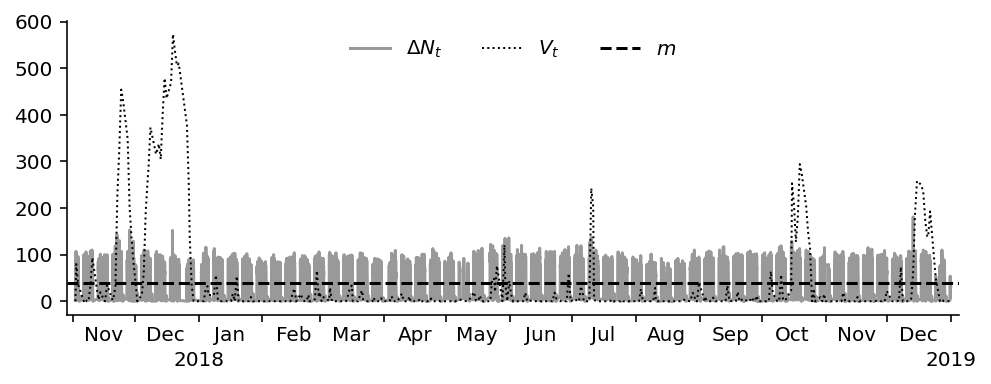

In [82]:
cs["N"].plot(**styles["N"])
cs["V"].iloc[::20].plot(**styles["V"]) 
plt.axhline(m, **styles["m"])

plt.margins(x=0.01)
put_months_between_ticks()
plt.legend(loc=9, ncol=4, frameon=False)

sns.despine()
# plt.savefig("../Figures/cusum-big-picture.pdf")

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/cusum-case-study-2018-10-12.pdf'.


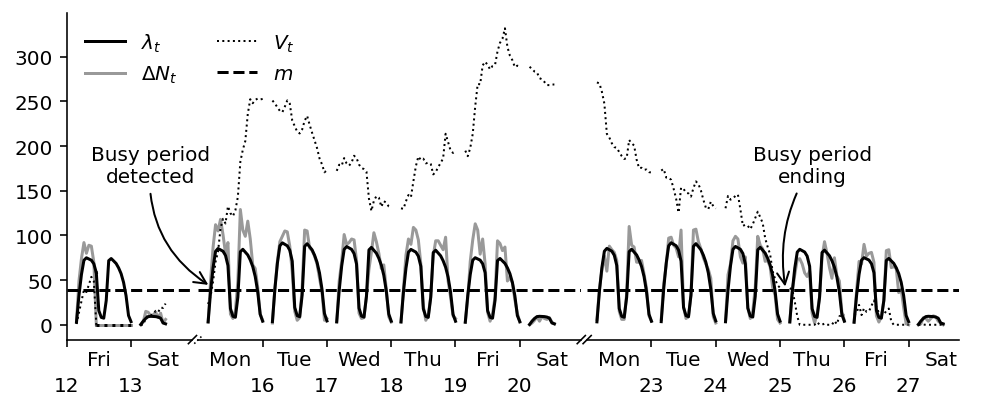

In [84]:
startDate = dt.date(2018, 10, 12)
csTrun = cs[str(startDate):].first("16D").copy()
csTrun = add_nans_to_days(csTrun)

newTime = stretch_time(csTrun.index, scale=1.85)

bax = broken_axis(csTrun)

for col in csTrun.columns:
    bax.plot(newTime, csTrun[col], **styles[col])

bax.axhline(m, zorder=2, **styles["m"])

prevV = csTrun.loc["2018-10-12 11:30", "V"]
normalPred = hh.loc["2018-10-12 11:30":"2018-10-12", "pred"]
missingTime = stretch_time(normalPred.index, scale=1.85)
bax.plot(missingTime, normalPred, **stylesNL["λ"])
bax.plot(missingTime[[0,-1]], [0,0], **stylesNL["N"])
bax.plot(missingTime[[0,-1]], [prevV, prevV], **stylesNL["V"])
# bax.legend(loc=2)

put_days_between_ticks(numletters=3, skiplast=False, dateskip=1, ax=bax.axs[0])
[put_days_between_ticks(numletters=3, dateskip=1, ax=ax) for ax in bax.axs[1:]]
bax.legend(loc=2, ncol=2, frameon=False)

# Add annotations to the plot describing when the alarms are raised
alarmed = csTrun[csTrun["V"] > m]

# Annotation for the beginning of the busy period
xTextDate = pd.Timestamp("2018-10-14 06")
xText = mdates.date2num(xTextDate)
yText = 160

xDate = alarmed.loc["2018-10-13":].index[0]
x = mdates.date2num(stretch_time([xDate]))

bax.annotate("Busy period\ndetected", xytext=(xText, yText), xy=(x, m*1.1),
            arrowprops=dict(arrowstyle="->", mutation_scale=15, connectionstyle="arc3,rad=.3"), ha='center')

# Annotation for the end of the busy period
xTextDate = pd.Timestamp("2018-10-25 12")
xText = mdates.date2num(xTextDate)
yText = 160

xDate = alarmed.index[-1] - pd.Timedelta("0.9H")
x = mdates.date2num(stretch_time([xDate]))

bax.annotate("Busy period\nending", xytext=(xText, yText), xy=(x, m),
            arrowprops=dict(arrowstyle="->", mutation_scale=15, connectionstyle="arc3,rad=.2"), ha='center')

fname = "../Figures/cusum-case-study-2018-10-12.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

2018-06-15
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/cusum-case-study-2018-06-15.pdf'.


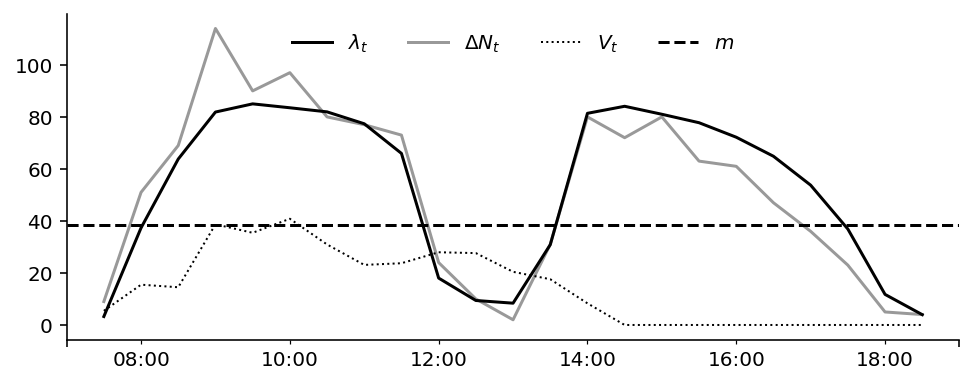

In [85]:
start = "2018-06-15"
print(start)

csTrun = cs.loc[start].copy()
csTrun = add_nans_to_days(csTrun)

for col in csTrun.columns:
    csTrun[col].plot(**styles[col]) 
    
# ax = csTrun.plot()
# ax.get_lines()[2].set_zorder(3)

plt.axhline(m, **styles["m"])

plt.legend(loc=9, ncol=4, frameon=False)

sns.despine()
fname = "../Figures/cusum-case-study-2018-06-15.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

## Running CUSUM on the modified data regime (Stéphane's idea)

In [86]:
csMod = df_test_hh[["pred", "numcalls"]].copy()
tuesdaysToEdit = np.unique(csMod.index[csMod.index.weekday == 1].date)[::3]

for date in tuesdaysToEdit:
    mornCalls = csMod.loc[str(date):str(date)+" 11:59", "numcalls"].sum()
    csMod.loc[str(date):str(date)+" 11:59", "numcalls"] = 0
    aftCalls = csMod.loc[str(date)+" 12:00":str(date), "numcalls"].sum()
    
    csMod.loc[str(date)+" 12:00":str(date), "numcalls"] = np.round(
        csMod.loc[str(date)+" 12:00":str(date), "numcalls"] * (mornCalls + aftCalls) / aftCalls)

In [87]:
csMod.columns = ["λ", "N"]
csMod.index.name = ""

N_t = np.cumsum(csMod["N"])
Lambda_t = np.cumsum(csMod["λ"])

U_t = N_t - β * Lambda_t
csMod["V"] = U_t - U_t.shift(1).cummin().fillna(0)
csMod.loc[csMod["V"] < 0, "V"] = 0

print(np.mean(csMod["N"] > csMod["λ"]))
print(np.mean(csMod.loc["2018", "V"] > m))

0.4438685036147865
0.3468838975007909


In [88]:
# Add a few calls to the modified Tuesday mornings so 
# the 0's can be seen above the x axis in the plots 
for date in tuesdaysToEdit:
    csMod.loc[str(date):str(date)+" 11:59", "N"] = 3

In [89]:
dts = []
maxs = []
for tues in tuesdaysToEdit:
    dts.append(mdates.date2num(pd.Timestamp(str(tues) + " 14:00")))
    maxs.append(csMod.loc[str(tues), "N"].max())

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/modified-tuesdays-big-picture.pdf'.


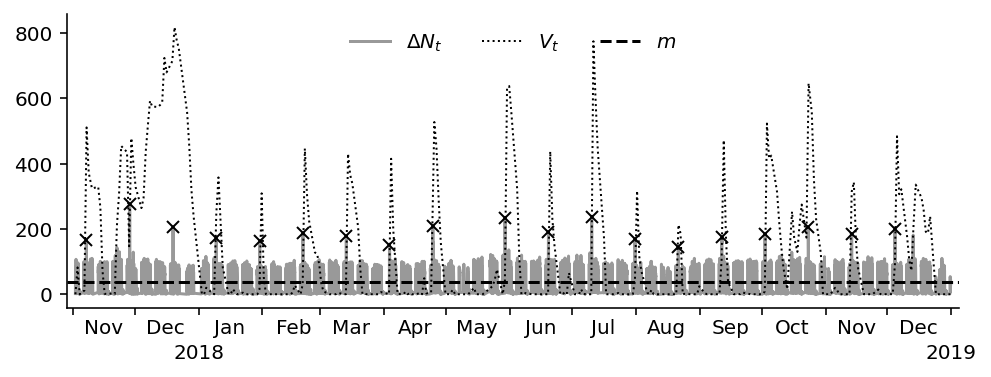

In [90]:
csMod["N"].plot(**styles["N"])
csMod["V"].iloc[::25].plot(**styles["V"]) 

plt.axhline(m, **styles["m"])

plt.margins(x=0.01)
put_months_between_ticks()
plt.legend(loc=9, ncol=4, frameon=False)

plt.plot(dts, maxs, "x")
sns.despine()
fname = "../Figures/modified-tuesdays-big-picture.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

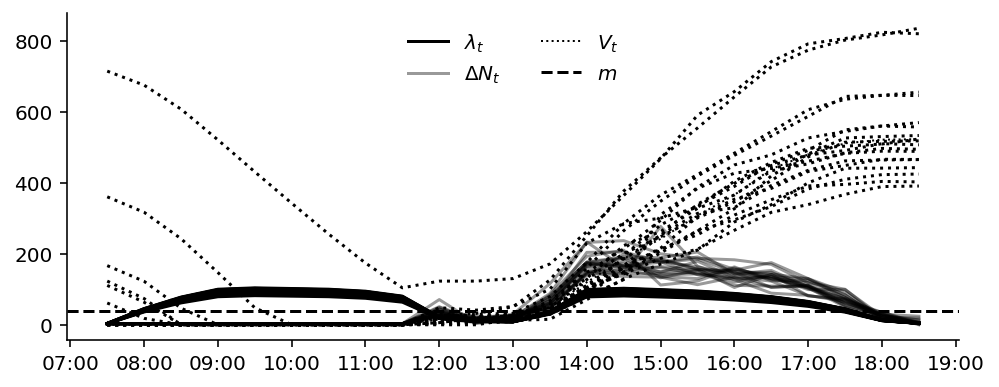

In [91]:
csTrun = csMod.loc[str(tuesdaysToEdit[0])].copy()
csTrun = add_nans_to_days(csTrun)
firstIndex = csTrun.index

for i, tuesday in enumerate(tuesdaysToEdit):
    start = str(tuesday)
    csTrun = csMod.loc[start].copy()
    csTrun = add_nans_to_days(csTrun)
    csTrun.index = firstIndex
    
    for col in csTrun.columns:
        if i == 0:
            plt.plot(firstIndex, csTrun[col], **styles[col])
        else:
            plt.plot(firstIndex, csTrun[col], **stylesNL[col])
    
plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

plt.axhline(m, **styles["m"])

plt.legend(loc=0, ncol=2, frameon=False)
sns.despine()

# fname = "../Figures/modified-tuesdays.pdf"
# plt.savefig(fname)
# !pdfcrop $fname $fname

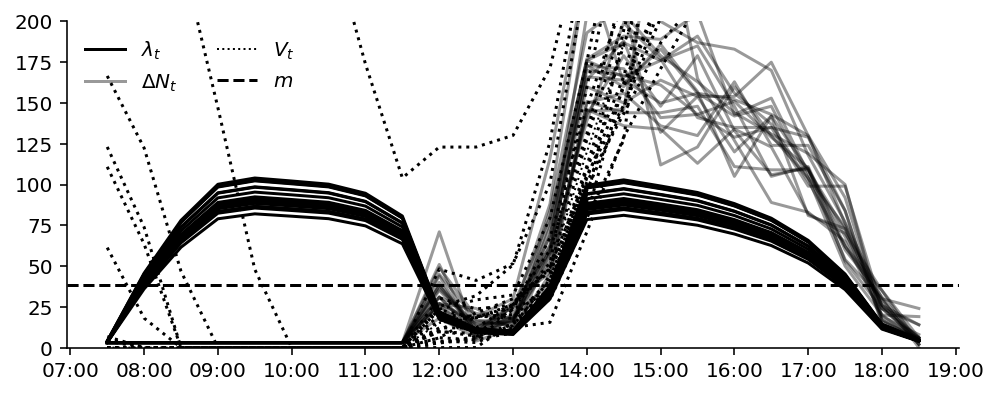

In [92]:
# csTrun = csMod.loc[str(tuesdaysToEdit[0])].copy()
# csTrun = add_nans_to_days(csTrun)
# firstIndex = csTrun.index

# for i, tuesday in enumerate(tuesdaysToEdit):
#     start = str(tuesday)
#     csTrun = csMod.loc[start].copy()
#     csTrun = add_nans_to_days(csTrun)
#     csTrun.index = firstIndex
    
#     for col in csTrun.columns:
#         if i == 0:
#             plt.plot(firstIndex, csTrun[col], **styles[col])
#         else:
#             plt.plot(firstIndex, csTrun[col], **stylesNL[col])
    
# plt.gca().xaxis.set_major_locator(mdates.HourLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# plt.axhline(m, **styles["m"])

# plt.legend(loc=0, ncol=2, frameon=False)
# plt.ylim([0,200])
# sns.despine()
## fname = "../Figures/modified-tuesdays-zoomed.pdf"
## plt.savefig(fname)
## !pdfcrop $fname $fname

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/modified-tuesday-2018-04-03.pdf'.


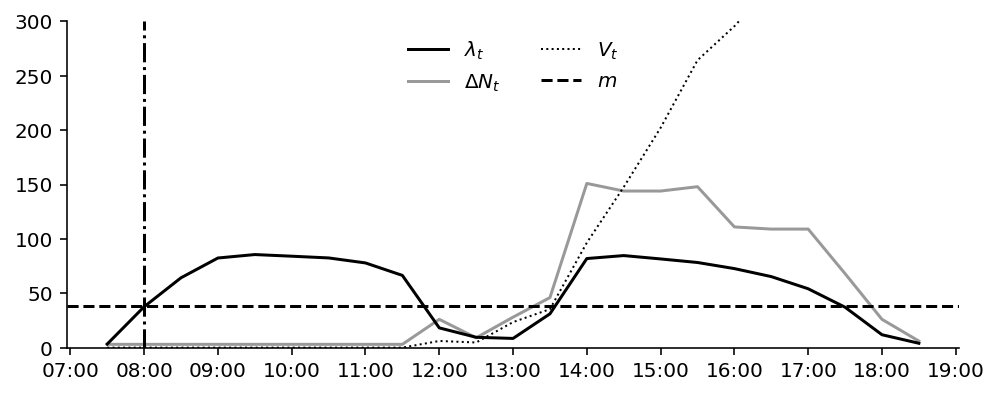

In [93]:
start = str(tuesdaysToEdit[7])
csTrun = csMod.loc[start].copy()
csTrun = add_nans_to_days(csTrun)
csTrun.index = firstIndex

for col in csTrun.columns:
    plt.plot(firstIndex, csTrun[col], **styles[col]) 

plt.axhline(m, **styles["m"])

plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

downAlarm = str(tuesdaysToEdit[0]) + " 08:00"
plt.axvline(mdates.date2num(pd.Timestamp(downAlarm)), ls="-.", c="k")
plt.legend(loc=0, ncol=2, frameon=False)
plt.ylim([0,300])
sns.despine()
fname = f"../Figures/modified-tuesday-{start}.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

In [94]:
csModFit = df_test_hh[["pred", "numcalls"]].copy()
tuesdaysToEdit = np.unique(csModFit.index[csModFit.index.weekday == 1].date)[::3]

for date in tuesdaysToEdit:
    mornCalls = csModFit.loc[str(date):str(date)+" 11:59", "numcalls"].sum()
    csModFit.loc[str(date):str(date)+" 11:59", "numcalls"] = 0
    aftCalls = csModFit.loc[str(date)+" 12:00":str(date), "numcalls"].sum()
    
    csModFit.loc[str(date)+" 12:00":str(date), "numcalls"] = np.round(
        csModFit.loc[str(date)+" 12:00":str(date), "numcalls"] * (mornCalls + aftCalls) / aftCalls)
  
    mornPreds = csModFit.loc[str(date):str(date)+" 11:59", "pred"].sum()
    csModFit.loc[str(date):str(date)+" 11:59", "pred"] = 0
    aftPreds = csModFit.loc[str(date)+" 12:00":str(date), "pred"].sum()
    csModFit.loc[str(date)+" 12:00":str(date), "pred"] *= (mornPreds + aftPreds) / aftPreds

In [95]:
csModFit.columns = ["λ", "N"]
csModFit.index.name = ""

N_t = np.cumsum(csModFit["N"])
Lambda_t = np.cumsum(csModFit["λ"])

U_t = N_t - β * Lambda_t
csModFit["V"] = U_t - U_t.shift(1).cummin().fillna(0)
csModFit.loc[csModFit["V"] < 0, "V"] = 0

print(np.mean(csModFit["N"] > csModFit["λ"]))
print(np.mean(csModFit.loc["2018", "V"] > m))

0.4234074478243077
0.10882632078456185


PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/modified-tuesdays-fitted-big-picture.pdf'.


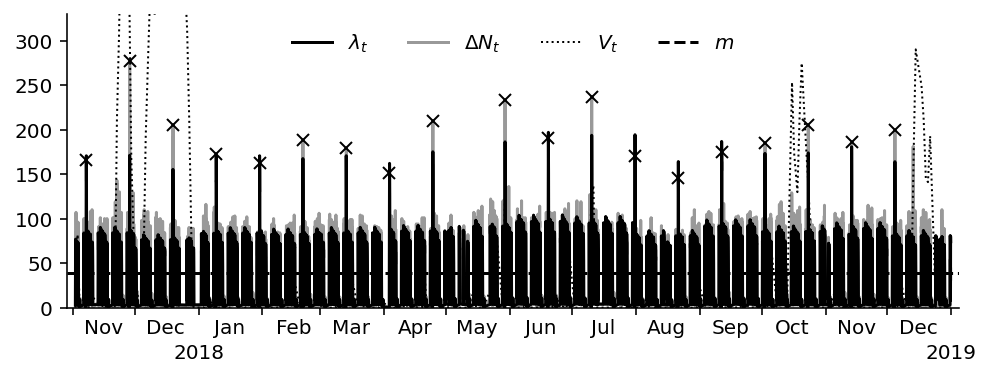

In [96]:
csModFit["λ"].iloc[::].plot(**styles["λ"])
csModFit["N"].plot(**styles["N"])
csModFit["V"].iloc[::25].plot(**styles["V"]) 

plt.axhline(m, **styles["m"])

plt.margins(x=0.01)
put_months_between_ticks()
plt.legend(loc=9, ncol=4, frameon=False)
plt.plot(dts, maxs, "x")
plt.ylim([0, 330])
sns.despine()
fname = f"../Figures/modified-tuesdays-fitted-big-picture.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

2018-01-22
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/modified-tuesdays-fitted-2018-01-22.pdf'.


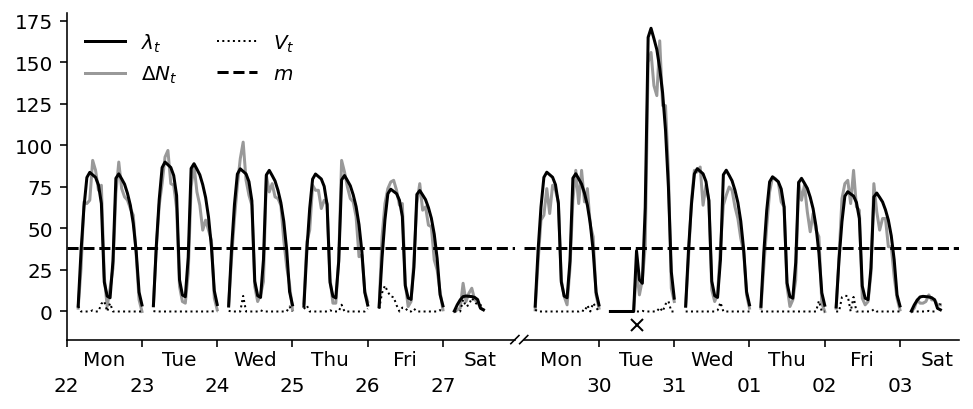

In [97]:
start = str(tuesdaysToEdit[3])

startDate = tuesdaysToEdit[4] - pd.Timedelta("8D")
print(startDate)
csTrun = csModFit[str(startDate):].first("14D").copy()
csTrun = add_nans_to_days(csTrun)

newTime = stretch_time(csTrun.index, scale=1.85)

bax = broken_axis(csTrun)

for col in csTrun.columns:
    bax.plot(newTime, csTrun[col], **styles[col]) 

bax.axhline(m, zorder=2, **styles["m"])

month = startDate.strftime("%B %Y")
# plt.title(month)
put_days_between_ticks(numletters=3, skiplast=False, dateskip=1, ax=bax.axs[0])
[put_days_between_ticks(numletters=3, dateskip=1, ax=ax) for ax in bax.axs[1:]]
bax.legend(loc=2, ncol=2, frameon=False)

bax.plot(pd.Timestamp(tuesdaysToEdit[4]) + pd.Timedelta("12H"), -8, "x")
# bax.plot(tuesdaysToEdit[4] + pd.Timedelta("1D"), -5, "x", c="r")
fname = f"../Figures/modified-tuesdays-fitted-{startDate}.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

### Compare GLM with XGBoost for prediction of next step

In [98]:
import xgboost as xgb

In [99]:
label = df_both["numcalls"]

df_boost = df_both.copy()
# df_boost["year"] = df_boost.index.year 
df_boost["dayofweek"] = df_boost.day
df_boost["dayofyear"] = df_boost.index.dayofyear
# data = df_boost[["dayofyear", "year", "dayofweek", "prevhol"]]
data = df_boost[["dayofyear", "dayofweek", "prevhol"]]

dtrain = data.loc[dt_train]
labeltrain = label.loc[dt_train]
dtest = data.loc[dt_test]
labeltest = label.loc[dt_test]

dtrain = xgb.DMatrix(dtrain, label=labeltrain)
dtest = xgb.DMatrix(dtest, label=labeltest)

In [100]:
df_nupic = df_both.copy()
df_nupic["year"] = df_nupic.index.year 
df_nupic["dayofweek"] = df_nupic.day
df_nupic["dayofyear"] = df_nupic.index.dayofyear
df_nupic = df_nupic[["numcalls", "dayofyear", "year", "dayofweek", "prevhol"]]

In [101]:
param = {}
num_round = 50

evallist = [(dtest, 'eval'), (dtrain, 'train')]

bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-rmse:805.378	train-rmse:724.119
[1]	eval-rmse:595.581	train-rmse:515.099
[2]	eval-rmse:451.999	train-rmse:369.578
[3]	eval-rmse:353.182	train-rmse:270.359
[4]	eval-rmse:284.813	train-rmse:201.393
[5]	eval-rmse:236.321	train-rmse:155.13
[6]	eval-rmse:204.753	train-rmse:125.982
[7]	eval-rmse:182.519	train-rmse:105.659
[8]	eval-rmse:167.103	train-rmse:94.0329
[9]	eval-rmse:157.866	train-rmse:86.9046
[10]	eval-rmse:151.104	train-rmse:82.2193
[11]	eval-rmse:146.713	train-rmse:78.9039
[12]	eval-rmse:143.324	train-rmse:75.9461
[13]	eval-rmse:141.201	train-rmse:74.3101
[14]	eval-rmse:139.409	train-rmse:73.2939
[15]	eval-rmse:137.882	train-rmse:72.446
[16]	eval-rmse:136.979	train-rmse:71.661
[17]	eval-rmse:136.469	train-rmse:69.2053
[18]	eval-rmse:135.785	train-rmse:68.24
[19]	eval-rmse:135.55	train-rmse:67.8443
[20]	eval-rmse:135.508	train-rmse:66.7703
[21]	eval-rmse:135.25	train-rmse:64.6738
[22]	eval-rmse:135.175	train-rmse:64.3101
[23]	eval-rmse:135.615	train-rmse:62.2775
[24]	eval

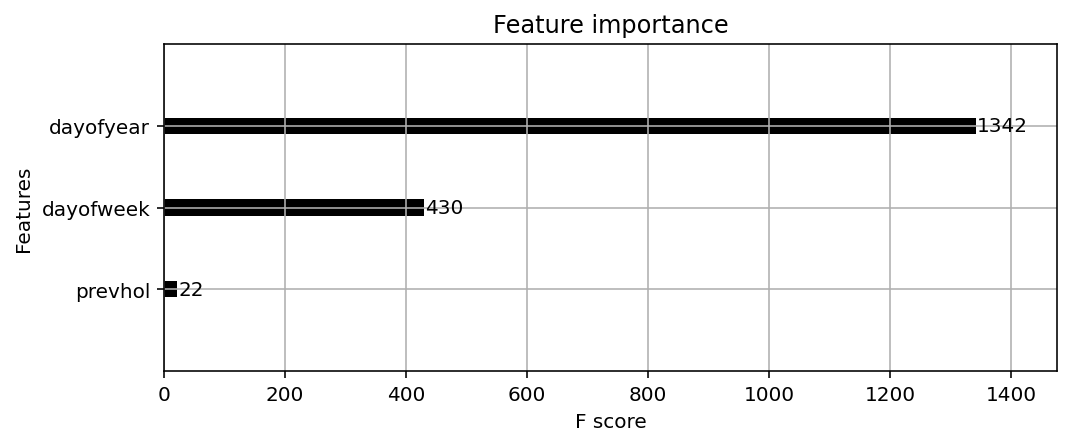

In [102]:
xgb.plot_importance(bst);

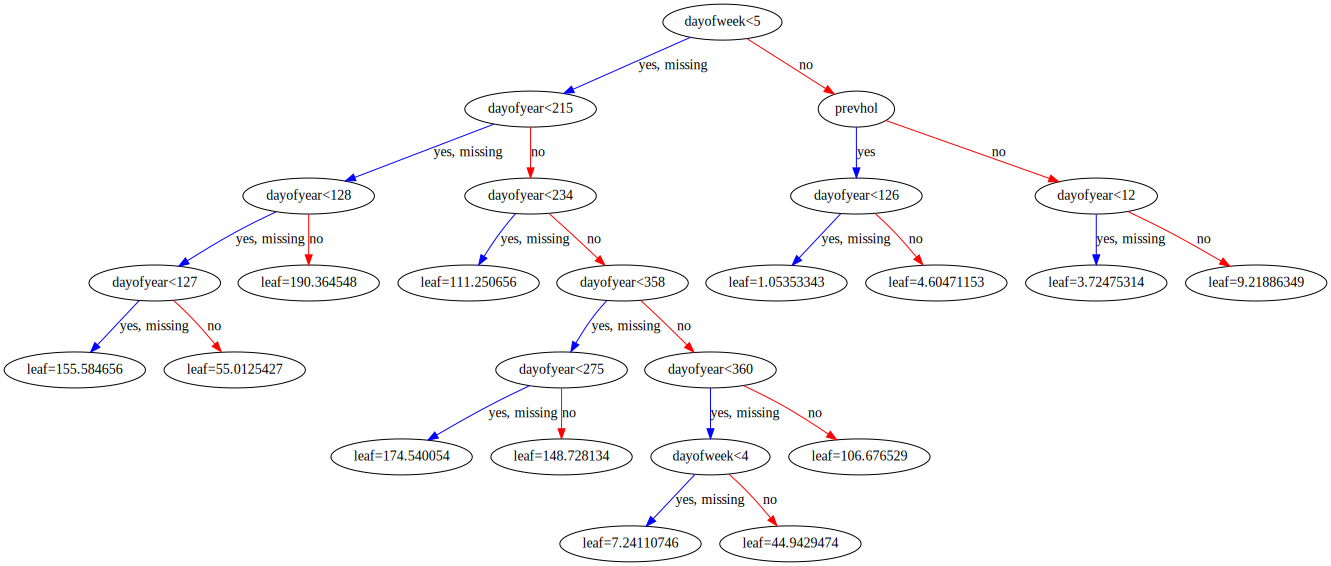

In [103]:
res = xgb.to_graphviz(bst, num_trees=2)
display(res)

In [104]:
ypred = bst.predict(dtest)
df_test["boost_pred"] = ypred

## Compare CUSUM to NuPIC 

In [105]:
anom = pd.read_csv("nupic/h_nona_test_out.csv")

anom.columns = ["date_time", "numcalls",  "prediction", "anomaly_score", "anomaly_likelihood"]
anom.date_time = pd.to_datetime(anom.date_time)
anom = anom.set_index("date_time")
anom["prediction"] = anom["prediction"].shift(1)
anom = add_nans_to_days(anom)

numcalls  prediction  anomaly_score  anomaly_likelihood
2017-11-02 07:00:00       NaN         NaN            NaN                 NaN
2017-11-02 07:30:00       2.0         NaN          0.025                 0.5
2017-11-02 08:00:00      27.0    46.00000          0.025                 0.5
2017-11-02 08:30:00      70.0    12.00000          0.000                 0.5
2017-11-02 09:00:00      84.0    81.40943          0.000                 0.5
...                       ...         ...            ...                 ...
2018-12-31 17:00:00       NaN         NaN            NaN                 NaN
2018-12-31 17:30:00       NaN         NaN            NaN                 NaN
2018-12-31 18:00:00       NaN         NaN            NaN                 NaN
2018-12-31 18:30:00       NaN         NaN            NaN                 NaN
2018-12-31 19:00:00       NaN         NaN            NaN                 NaN

[10625 rows x 4 columns]

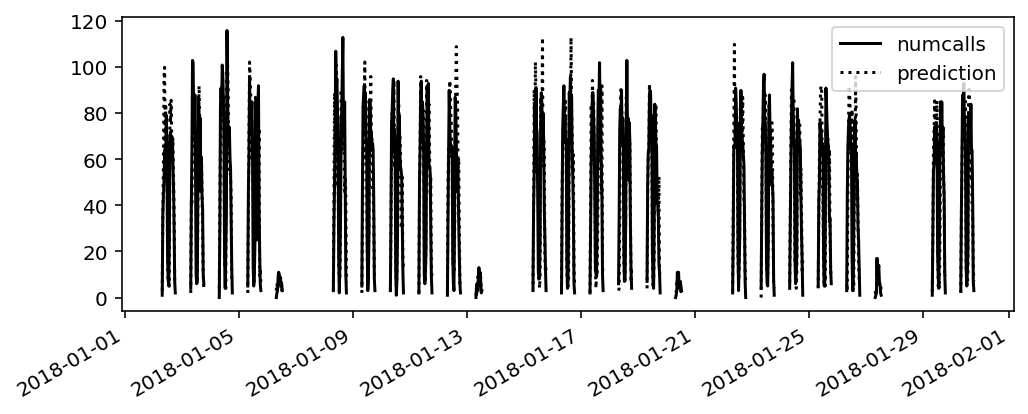

In [106]:
anom[["numcalls", "prediction"]]["2018"].first("1M").plot()

In [107]:
anomNA = anom.dropna()
np.corrcoef(anomNA["numcalls"], anomNA["prediction"])[0,1]

0.8589766543236701

In [108]:
np.corrcoef(df_test_hh["numcalls"], df_test_hh["pred"])[0,1]

0.9526038388026535

In [109]:
np.sum((anomNA["numcalls"] - anomNA["prediction"])**2)

2327674.1097197896

In [110]:
np.sum((df_test_hh["numcalls"] - df_test_hh["pred"])**2)

769671.270917642

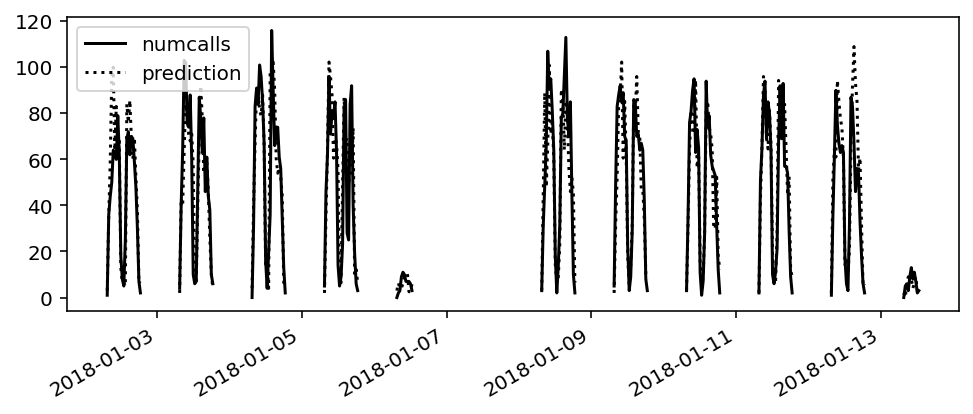

In [111]:
anom[["numcalls", "prediction"]]["2018"].first("2W").plot()

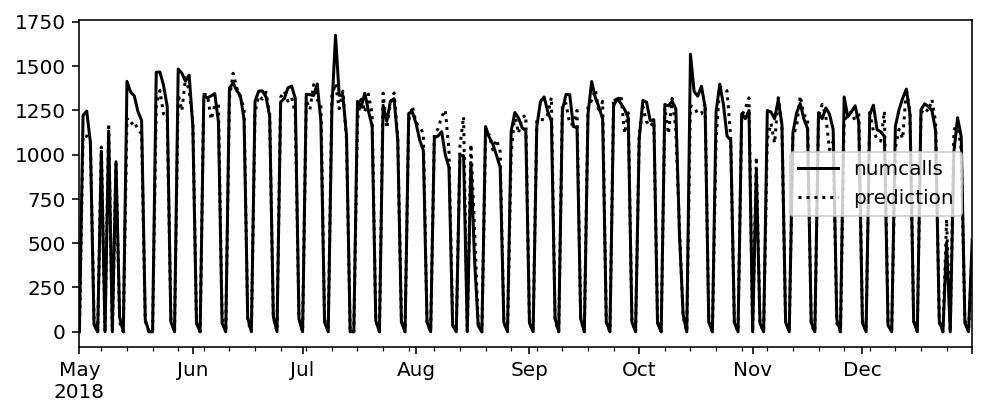

In [112]:
grouped = anom[["numcalls", "prediction"]].groupby(anom.index.date).sum()
grouped.index = pd.DatetimeIndex(grouped.index)
grouped["2018 5":].first("8M").plot()

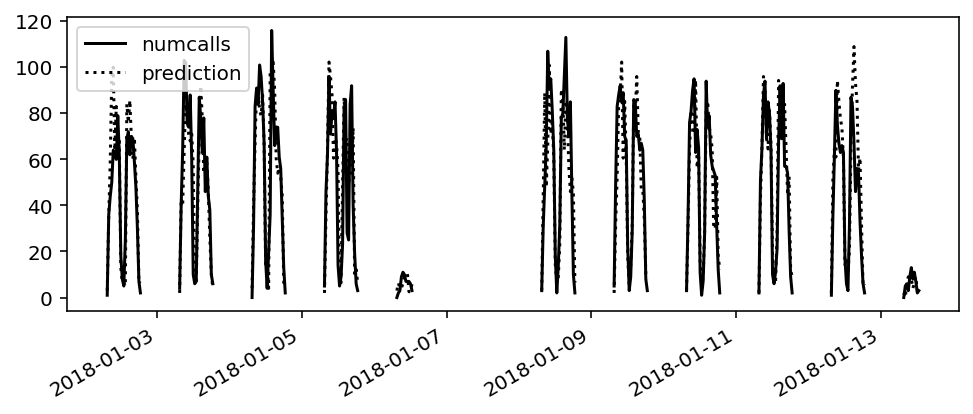

In [113]:
anom[["numcalls", "prediction"]]["2018"].first("2W").plot()

-83.7 1757.7


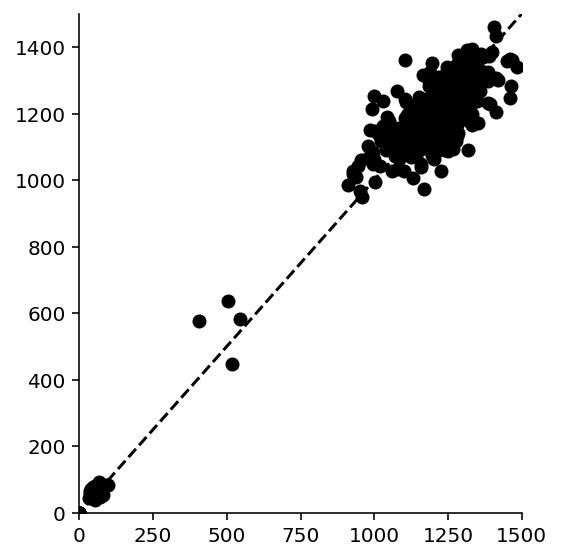

In [114]:
plt.figure(figsize=[4,4])
plt.scatter(grouped["numcalls"], grouped["prediction"])
xl, xr = plt.xlim()
print(xl, xr)
plt.plot([xl, xr], [xl, xr], color="k", ls="--")
plt.xlim([0,1500]); plt.ylim([0, 1500])
sns.despine()
plt.tight_layout()

-6.1000000000000005 128.1


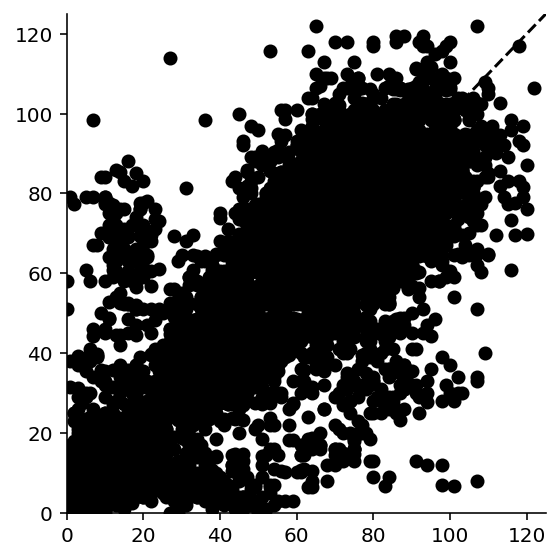

In [115]:
plt.figure(figsize=[4,4])
a = anom.copy()
a = a[a.numcalls < 125]
plt.scatter(a["numcalls"], a["prediction"])
xl, xr = plt.xlim()
print(xl, xr)
plt.plot([xl, xr], [xl, xr], color="k", ls="--")
plt.xlim([0,125]); plt.ylim([0, 125])
sns.despine()
plt.tight_layout()
# plt.savefig("../Figures/linear-regression-test-scatter.pdf")

In [116]:
csBoth = cs.copy()
# csBoth["NuPIC"] = 100 * anom["anomaly_likelihood"]
csBoth["NuPIC"] = 100 * anom["anomaly_score"]
# csBoth["NuPIC"] = 100 * (1 - anom["anomaly_likelihood"])

In [123]:
np.corrcoef(csBoth["NuPIC"], csBoth["V"])[0,1]

0.06420946008970488

December 2018
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/nupic-cusum-2018-12-05.pdf'.


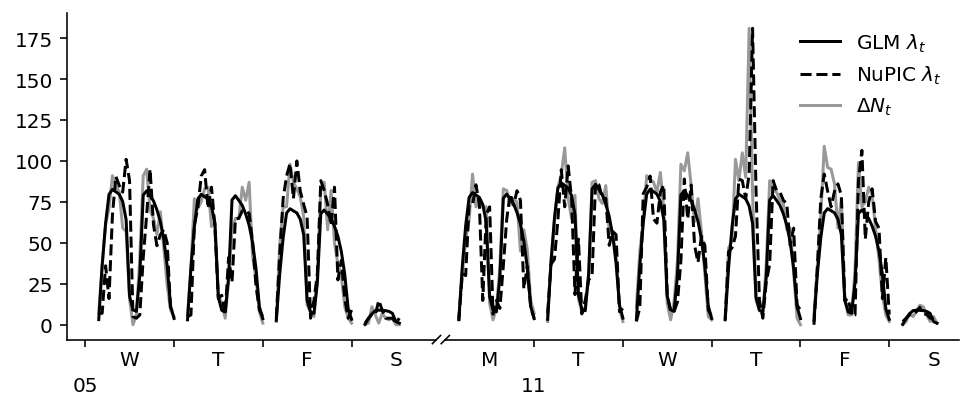

December 2018
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/nupic-cusum-2018-12-05-alarms.pdf'.


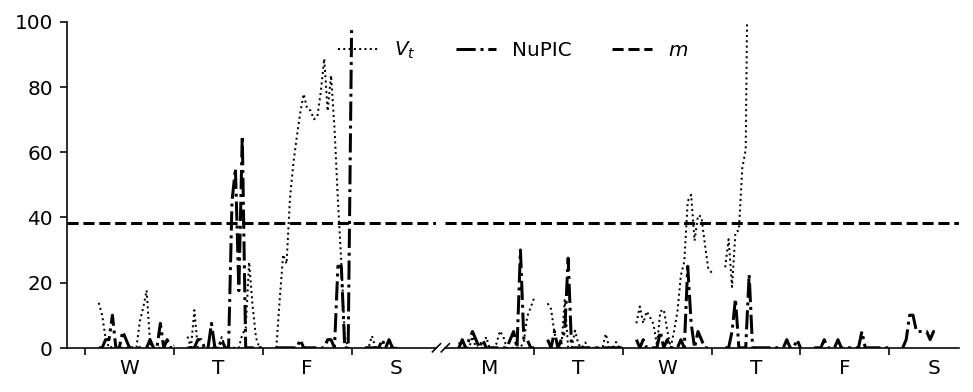

In [124]:
startDate = dt.date(2018, 12, 5)

csNupic = csBoth.loc[dt_test_hh].copy()
csNupic["λ"] 
csNupic["NuPIC λ"] = anom["prediction"] 

csTrun = csNupic[str(startDate):].first("12D").copy()
csTrun = add_nans_to_days(csTrun)
newTime = stretch_time(csTrun.index, scale=1.85)

d1, d2 = min_max_dates(csTrun)
# csTrun1 = csTrun[["GLM $\lambda_t$", "NuPIC $\lambda_t$", "$\Delta N_t$"]]

bax = broken_axis(csTrun, leftpad=pd.Timedelta("12H")) 
plt.xlim(d1, d2)
plt.margins(x=0.05)

bax.plot(newTime, csTrun["λ"], label="GLM $\lambda_t$", **stylesNL["λ"]) 
bax.plot(newTime, csTrun["NuPIC λ"], label="NuPIC $\lambda_t$", **stylesNL["m"]) 
bax.plot(newTime, csTrun["N"], label="$\Delta N_t$", **stylesNL["N"]) 

month = startDate.strftime("%B %Y")
print(month)
put_days_between_ticks(skiplast=True, ax=bax.axs[0])
[put_days_between_ticks(ax=ax) for ax in bax.axs[1:]]

bax.legend(loc=1, ncol=1, frameon=False)

fname = f"../Figures/nupic-cusum-{startDate}.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname
plt.show()

bax = broken_axis(csTrun, leftpad=pd.Timedelta("12H")) 

bax.plot(newTime, csTrun["V"], **styles["V"]) 
bax.plot(newTime, csTrun["NuPIC"], **styles["NuPIC"]) 


plt.xlim(d1, d2)
plt.margins(x=0.05)


bax.axhline(m, **styles["m"])

month = startDate.strftime("%B %Y")
print(month)
put_days_between_ticks(skiplast=True, ax=bax.axs[0])
[put_days_between_ticks(ax=ax) for ax in bax.axs[1:]]

bax.legend(loc=9, ncol=5, frameon=False)
bax.set_ylim([0, 100])
fname = f"../Figures/nupic-cusum-{startDate}-alarms.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname
plt.show()

### Comparing GLM, XGBoost, NuPIC

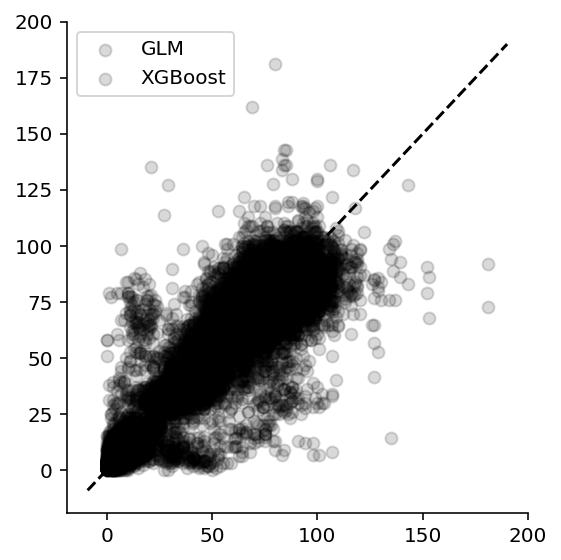

In [125]:
plt.figure(figsize=[4,4])
plt.scatter(df_test_hh["numcalls"], df_test_hh["pred"], alpha=0.15)
# plt.scatter(df_test_h["numcalls"], df_test_h["boost_pred"])
plt.scatter(anom["numcalls"], anom["prediction"], alpha=0.15)
# plt.scatter(grouped["numcalls"], grouped["prediction"])
plt.legend(["GLM", "XGBoost"])
xl, xr = plt.xlim()
plt.plot([xl, xr], [xl, xr], color="k", ls="--")
sns.despine()
plt.tight_layout()

In [126]:
np.corrcoef(df_test["numcalls"], df_test["pred"])[0,1], \
np.corrcoef(df_test["numcalls"], df_test["boost_pred"])[0,1], \
np.corrcoef(grouped["numcalls"], grouped["prediction"])[0,1]

(0.9693205797357635, 0.9653688035114839, 0.9904876703385843)

In [127]:
np.sum((df_test["numcalls"] - df_test["pred"])**2), \
np.sum((df_test["numcalls"] - df_test["boost_pred"])**2), \
np.sum((grouped["numcalls"] - grouped["prediction"])**2)

(4258679.119016589, 6640782.086401336, 2520462.090773995)

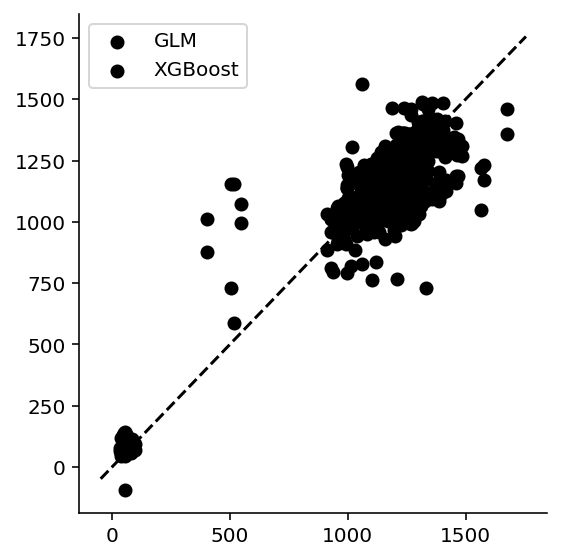

In [128]:
plt.figure(figsize=[4,4])
plt.scatter(df_test["numcalls"], df_test["pred"])
plt.scatter(df_test["numcalls"], df_test["boost_pred"])
# plt.scatter(grouped["numcalls"], grouped["prediction"])
plt.legend(["GLM", "XGBoost"])
xl, xr = plt.xlim()
plt.plot([xl, xr], [xl, xr], color="k", ls="--")
sns.despine()
plt.tight_layout()
# plt.savefig("../Figures/linear-regression-test-scatter.pdf")

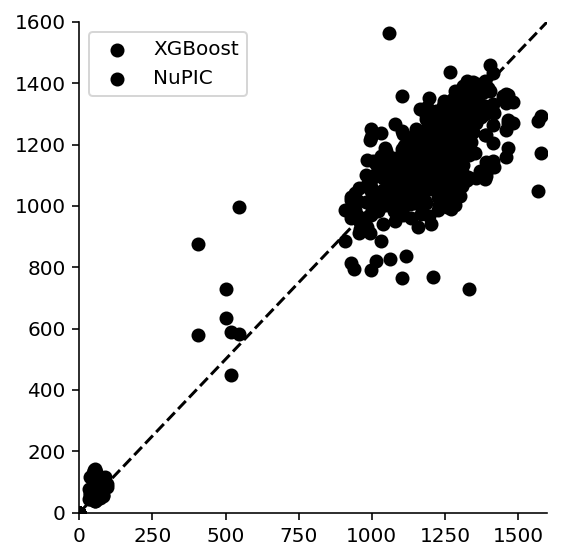

In [129]:
plt.figure(figsize=[4,4])
# plt.scatter(df_test["numcalls"], df_test["pred"], alpha=1)
plt.scatter(df_test["numcalls"], df_test["boost_pred"])
plt.scatter(grouped["numcalls"], grouped["prediction"])
plt.legend(["XGBoost", "NuPIC"])
xl, xr = plt.xlim()
xl = 0; xr = 1600
plt.xlim([xl, xr])
plt.ylim([xl, xr])
plt.plot([xl, xr], [xl, xr], color="k", ls="--")
sns.despine()
plt.tight_layout()
# plt.savefig("../Figures/linear-regression-test-scatter.pdf")

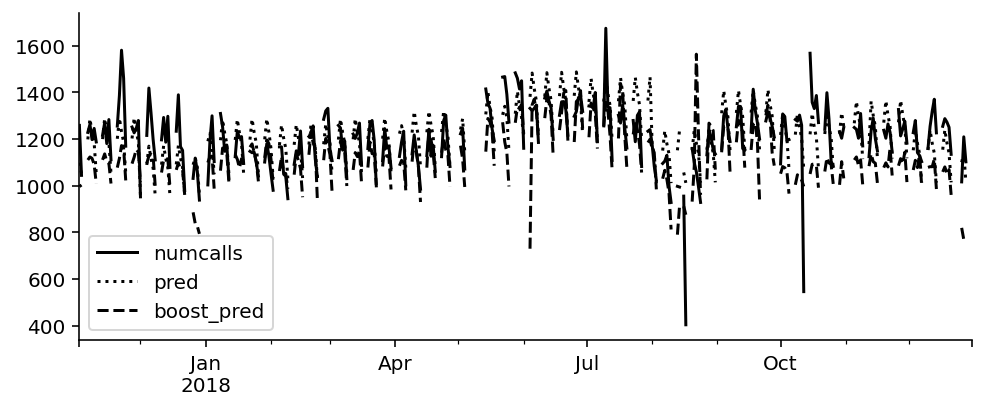

In [130]:
newind = pd.date_range(df_test.index.min(), df_test.index.max())
df_plot = df_test[df_test.workday][["numcalls", "pred", "boost_pred"]].reindex(newind)
df_plot.plot(legend=True)
# plt.legend(["Observed", "Predicted"], loc=9, ncol=2, frameon=False);
sns.despine()
# plt.savefig("../Figures/linear-regression-test.pdf")

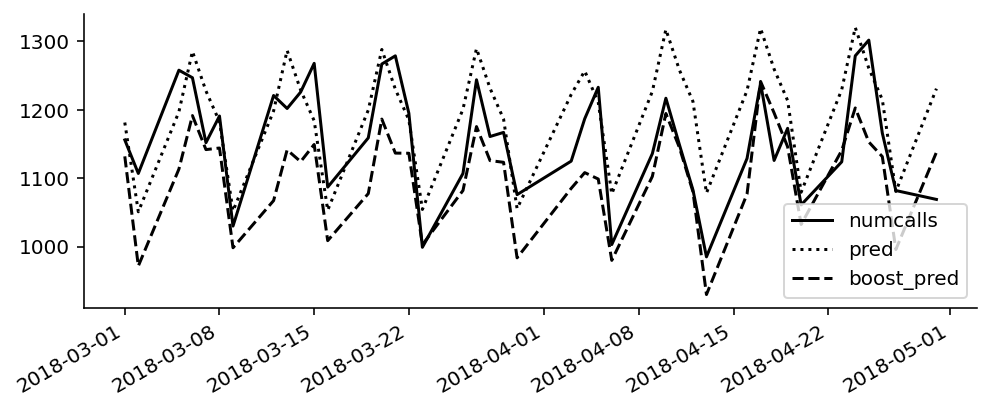

In [131]:
newind = pd.date_range(df_test.index.min(), df_test.index.max())
df_plot = df_test[df_test.workday][["numcalls", "pred", "boost_pred"]]["2018 3":].first("2M")
df_plot.plot(legend=True)
# plt.legend(["Observed", "Predicted"], loc=9, ncol=2, frameon=False);
sns.despine()
# plt.savefig("../Figures/linear-regression-test.pdf")

## CUSUM examples on simulated data

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `../Figures/intensity.pdf'.


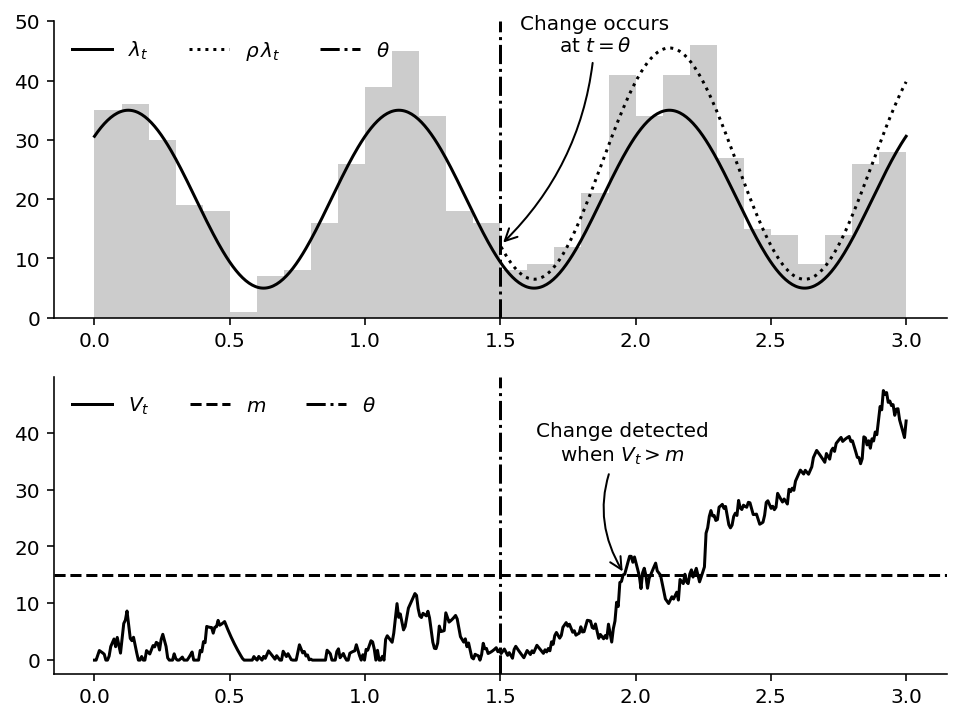

In [133]:
rg = default_rng(1)

T = 3
θ = 1.5; ρ = 1.3
π = np.pi; a = 15; c = 20; ϕ = 1.75 * π

bigScale = 10

λ1 = lambda t: bigScale * ( a*np.cos(t*2*π + ϕ) + c )
λ2 = lambda t: ρ*λ1(t)

Λ1 = lambda t: bigScale * ( a*np.sin(t*2*π + ϕ)/(2*π)  + c*t - a*np.sin(ϕ) / (2*π) )
Λ2 = lambda t: Λ1(θ) + bigScale *  ( ρ*(a*np.sin(t*2*π + ϕ)/(2*π)  + c*(t-θ) - a*np.sin(θ*2*π + ϕ) / (2*π)) )
    
λ = lambda t: (t < θ) * λ1(t) + (t >= θ) * ρ * λ1(t)
Λ = lambda t: (t < θ) * Λ1(t) + (t >= θ) * Λ2(t)

t = np.linspace(0, T, 500)
tBefore = t[t<θ]
tAfter = t[t>=θ]

# Simulate the inhomogenous Poisson process with the change at time θ
λMax = 500
N_T = rg.poisson(λMax * T)
ts = np.sort(rg.uniform(size=N_T)) * T
keep = rg.uniform(size=N_T) < (λ(ts) / λMax)
ts = ts[keep]

N_t = np.array([np.sum(ts <= s) for s in t])

# Calculate the CUSUM process
Lambda_t = Λ1(t)
β = (ρ - 1) / np.log(ρ)
U_t = N_t - β * Lambda_t
minU_t = np.insert(np.minimum.accumulate(U_t), 0, 0)[:-1]
V_t = np.maximum(U_t - minU_t, 0)

# Plot the results
fig, axs = plt.subplots(2, 1,  figsize=(8.0, 6.0))

l, = axs[0].plot(t, λ1(t) / bigScale)
axs[0].plot(tAfter, λ2(tAfter) / bigScale)
axs[0].set_ylim([0, 50])

xs = np.arange(0, T, 0.1)
ys = [np.sum((ts >= xs[i-1]) & (ts < xs[i])) for i in range(1, len(xs))]
ys += [np.sum(ts > xs[-1])]
# plt.ylabel("$\lambda_t$")
axs[0].axvline(θ, ls="-.")
axs[0].legend([r"$\lambda_t$", r"$\rho \, \lambda_t$", r"$\theta$"],
            frameon=False, ncol=3)
axs[0].bar(xs, np.array(ys), alpha=0.2, width=0.1, align="edge")

axs[0].annotate("Change occurs\nat $t = \\theta$", xytext=(1.85, 45), xy=(θ, λ2(θ) / bigScale), ha='center',
            arrowprops=dict(arrowstyle="->", mutation_scale=15, connectionstyle="arc3,rad=-.2"))

mSim = 15
axs[1].plot(t, V_t)
axs[1].axhline(mSim, ls="--")
axs[1].axvline(θ, ls="-.")
# plt.ylabel("$V_t$", rotation=0)
axs[1].legend(["$V_t$", "$m$", r"$\theta$"], frameon=False, ncol=3)

axs[1].annotate("Change detected\nwhen $V_t > m$", xytext=(1.95, 35), xy=(t[V_t>mSim][0], mSim), ha='center',
            arrowprops=dict(arrowstyle="->", mutation_scale=15, connectionstyle="arc3,rad=.3"))
sns.despine()

fname = "../Figures/intensity.pdf"
plt.savefig(fname)
!pdfcrop $fname $fname

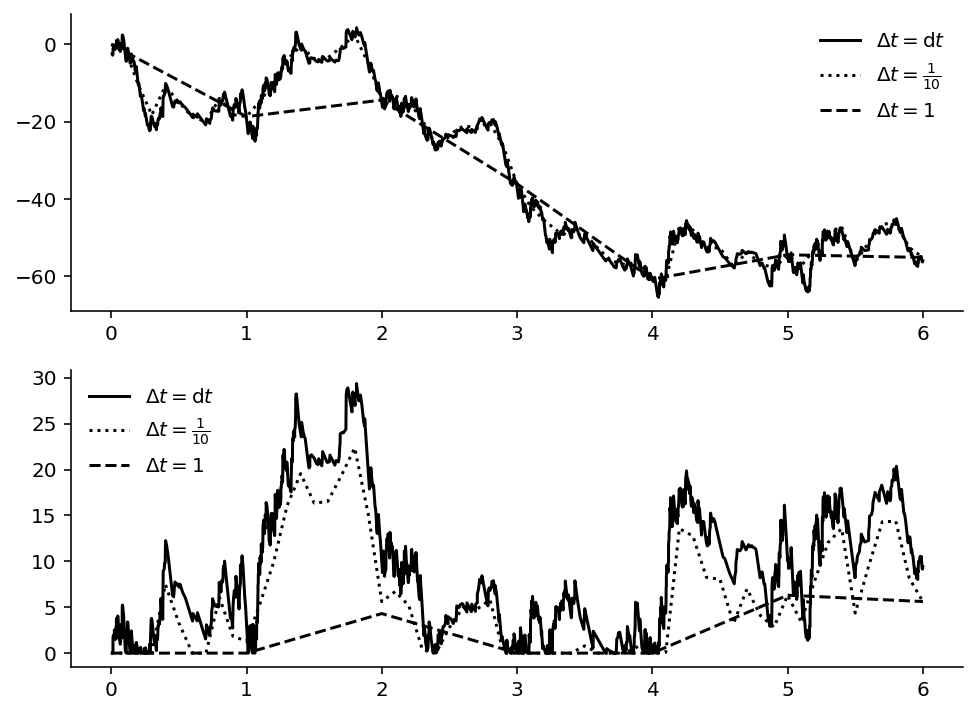

In [134]:
fig, axs = plt.subplots(2, 1,  figsize=(8.0, 6.0))

λ3 = lambda t: 1.1*λ1(t)

rg = default_rng(2)
λ3Max = 500
Tsim = 6
tsSim = np.sort(rg.uniform(size=rg.poisson(λ3Max * Tsim))) * Tsim
keep = rg.uniform(size=len(tsSim)) < (λ3(tsSim) / λ3Max)
tsSim = tsSim[keep]

t0 = tsSim
N_t0 = np.arange(len(t0))
Lambda_t0 = Λ1(t0)
U_t0 = N_t0 - β * Lambda_t0
min_U_t0 = np.insert(np.minimum.accumulate(U_t0), 0, 0)[:-1]
V_t0 = np.maximum(U_t0 - min_U_t0, 0)

axs[0].plot(t0, U_t0)
axs[1].plot(t0, V_t0)


for Δ in [0.1, 1]:
    tΔ = np.arange(0, Tsim+Δ, Δ)

    N_tΔ = np.array([np.sum(tsSim <= s) for s in tΔ])
    Lambda_tΔ = Λ1(tΔ)
    
    U_tΔ = N_tΔ - β * Lambda_tΔ
    min_U_tΔ = np.insert(np.minimum.accumulate(U_tΔ), 0, 0)[:-1]
    V_tΔ = np.maximum(U_tΔ - min_U_tΔ, 0)

    axs[0].plot(tΔ, U_tΔ)
    axs[1].plot(tΔ, V_tΔ)
#     axs[1].plot(tΔ[1:], V_k)
    

axs[0].legend(["$\Delta t= \mathrm{d}t$", r"$\Delta t=\frac{1}{10}$", "$\Delta t=1$"], frameon=False)
axs[1].legend(["$\Delta t= \mathrm{d}t$", r"$\Delta t=\frac{1}{10}$", "$\Delta t=1$"], frameon=False)
sns.despine()

# fname = "../Figures/granularity.pdf"
# plt.savefig(fname)
# !pdfcrop $fname $fname